In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import os
import glob
import skimage.morphology
import imageio
import matplotlib.image as mpimg
import cv2
from timeit import default_timer as timer
import skimage.io
import tabloo
import pandasgui



In [47]:
from pandasgui import show

In [48]:
def create_skewed_image(image,box):
    pt_A = box[0]
    pt_B = box[1]
    pt_C = box[2]
    pt_D = box[3]
    
    width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
    width_BC = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
    maxWidth = int(max(width_AD,width_BC))

    height_AB = np.sqrt(((pt_B[0] - pt_A[0]) ** 2) + ((pt_B[1] - pt_A[1]) ** 2))
    height_CD = np.sqrt(((pt_D[0] - pt_C[0]) ** 2) + ((pt_D[1] - pt_C[1]) ** 2))
    maxHeight = int(max(height_AB,height_CD))

    input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
    output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])


    M = cv2.getPerspectiveTransform(input_pts,output_pts)
    out = cv2.warpPerspective(image,M,(maxWidth, maxHeight),flags=cv2.INTER_LINEAR)
    return out,M

In [49]:
def warp_calibrated_coord(coord,M):
    coord = np.append(np.array(coord),1)
    coor_trans = np.matmul(M,coord)
    return (int(coor_trans[0]),int(coor_trans[1]))      

def warp_skewed_coord(coord,M):
    coord = np.append(np.array(coord),1)
    coor_trans = np.matmul(M,coord)
    warp_x = int(coor_trans[0]/coor_trans[2])
    warp_y = int(coor_trans[1]/coor_trans[2])  
    return (warp_x,warp_y)     

def calibrate_image(image, box):
    
    x = box[3][0]-box[0][0]
    y = box[3][1]-box[0][1]
    diff_angle = np.tan(y/x)
    height, width = image.shape[:2]
    x_center = box[0][0]+(box[3][0]-box[0][0])/2
    y_center = box[0][1]+(box[2][1]-box[0][1])/2
    center = (x_center, y_center)

    deg = np.rad2deg(diff_angle)
    M = cv2.getRotationMatrix2D( center = center,angle =  deg,scale = 1 )
    rotated = cv2.warpAffine(image, M, dsize=(width,height))
    return rotated,M

(800, 1280, 3)
[(301, 299), (148, 797), (798, 801), (609, 299)]


<Figure size 1440x864 with 0 Axes>

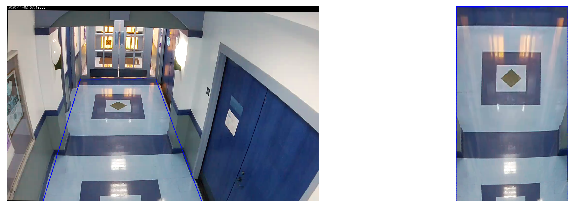

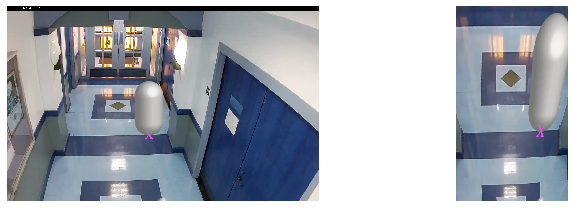

In [50]:
color = (0, 0, 255)
thickness = 2

plt.figure(figsize=(20,12))
intial_frame_se = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_se.png')
intial_frame_se_2 = cv2.imread(r'C:\Users\P Dog\Downloads\intial_frame_se_cap_2.png')
print(np.shape(intial_frame_se))
# pad_se = np.zeros((np.shape(intial_frame_se)[0]+600,np.shape(intial_frame_se)[1]+600,3)).astype(np.uint8)
# pad_se[:,:,0] = np.pad(intial_frame_se[:,:,0],300)
# pad_se[:,:,1] = np.pad(intial_frame_se[:,:,1],300)
# pad_se[:,:,2] = np.pad(intial_frame_se[:,:,2],300)

p1_se = (300, 300)
p2_se = (150, 799)
p3_se = (800,799)
p4_se = (608, 298)

intial_frame_se = cv2.line(intial_frame_se, p1_se, p2_se, color, thickness)
intial_frame_se = cv2.line(intial_frame_se, p1_se, p4_se, color, thickness)
intial_frame_se = cv2.line(intial_frame_se, p3_se, p4_se, color, thickness)


box_se = [p1_se,p2_se,p3_se,p4_se]
intial_frame_se,M_se_cal = calibrate_image(intial_frame_se,box_se)


p1_se_cal = warp_calibrated_coord(p1_se,M_se_cal)
p2_se_cal = warp_calibrated_coord(p2_se,M_se_cal)
p3_se_cal = warp_calibrated_coord(p3_se,M_se_cal)
p4_se_cal = warp_calibrated_coord(p4_se,M_se_cal)
box_se_cal = [p1_se_cal,p2_se_cal,p3_se_cal,p4_se_cal]
print(box_se_cal)

skew_se,M_se_skew = create_skewed_image(intial_frame_se,box_se_cal)
cv2.imwrite(r'C:\Users\P Dog\Downloads\skew_2.png', skew_se)
plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True



fig, ax = plt.subplots(nrows=1, ncols=2,gridspec_kw={'wspace':0, 'hspace':0})


ax[0].axis('off')
ax[0].imshow(intial_frame_se, cmap='gray')
ax[1].axis('off')
ax[1].imshow(skew_se, cmap='gray')

skew_se,M_se_skew = create_skewed_image(intial_frame_se_2,box_se_cal)
fig, ax = plt.subplots(nrows=1, ncols=2,gridspec_kw={'wspace':0, 'hspace':0})
cv2.imwrite(r'C:\Users\P Dog\Downloads\skew_1.png', skew_se)
ax[0].axis('off')
ax[0].imshow(intial_frame_se_2, cmap='gray')
ax[1].axis('off')
ax[1].imshow(skew_se, cmap='gray')

(800, 1280, 3)
[(301, 299), (148, 797), (798, 801), (609, 299)]


<Figure size 1440x864 with 0 Axes>

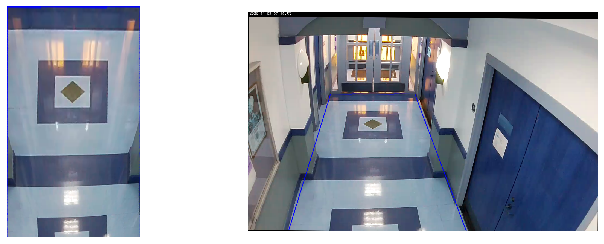

In [51]:
color = (0, 0, 255)
thickness = 2

plt.figure(figsize=(20,12))
intial_frame_se = cv2.imread(r'F:\Thomas and Brown Data\intial_frames\intial_frame_se.png')
print(np.shape(intial_frame_se))
# pad_se = np.zeros((np.shape(intial_frame_se)[0]+600,np.shape(intial_frame_se)[1]+600,3)).astype(np.uint8)
# pad_se[:,:,0] = np.pad(intial_frame_se[:,:,0],300)
# pad_se[:,:,1] = np.pad(intial_frame_se[:,:,1],300)
# pad_se[:,:,2] = np.pad(intial_frame_se[:,:,2],300)

p1_se = (300, 300)
p2_se = (150, 799)
p3_se = (800,799)
p4_se = (608, 298)

intial_frame_se = cv2.line(intial_frame_se, p1_se, p2_se, color, thickness)
intial_frame_se = cv2.line(intial_frame_se, p1_se, p4_se, color, thickness)
intial_frame_se = cv2.line(intial_frame_se, p3_se, p4_se, color, thickness)


box_se = [p1_se,p2_se,p3_se,p4_se]
intial_frame_se,M_se_cal = calibrate_image(intial_frame_se,box_se)

p1_se_cal = warp_calibrated_coord(p1_se,M_se_cal)
p2_se_cal = warp_calibrated_coord(p2_se,M_se_cal)
p3_se_cal = warp_calibrated_coord(p3_se,M_se_cal)
p4_se_cal = warp_calibrated_coord(p4_se,M_se_cal)
box_se_cal = [p1_se_cal,p2_se_cal,p3_se_cal,p4_se_cal]
print(box_se_cal)

skew_se,M_se_skew = create_skewed_image(intial_frame_se,box_se_cal)
plt.rcParams["figure.figsize"] = [10, 3.5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=2,gridspec_kw={'wspace':0, 'hspace':0})

ax[1].axis('off')
ax[1].imshow(intial_frame_se, cmap='gray')
ax[0].axis('off')
ax[0].imshow(skew_se, cmap='gray')

In [52]:
csv_file_name = r'C:\Users\P Dog\Downloads\two_subjects.csv'
print(csv_file_name)

C:\Users\P Dog\Downloads\two_subjects.csv


In [53]:
def translate_coord(coord, M_cal,M_skew):
    coord = warp_calibrated_coord(coord,M_cal)
    coord = warp_skewed_coord(coord,M_skew)
    return coord

In [54]:
import csv
import pandas as pd
import datetime
# def get_max_detections(csv_list):

def interpret_csv_data(file_path):
    detection_mat = []
    max_in_frame = 0
    with open(file_path, newline='') as csvfile:
        det_row = []
        reader = csv.reader(csvfile)

        for row in reader:


            if len(row)>max_in_frame:
                max_in_frame = len(row)
            if len(row)>1:
                det_row = [(row[0])]

                for i in range(1,len(row)):
                    split = row[i].split(',')
                    c1 = ''
                    c2 = ''
                    for val in split[0]:
                        if val.isdigit():
                            c1+=val
                    c1 = int(c1)
                    for val in split[1]:
                        if val.isdigit():
                            c2 += val
                    c2 =int(c2)
                    det_row+=[(c1,c2)]
            else:
                det_row = [(row[0])]
                

            detection_mat += [det_row]
            
        return detection_mat,max_in_frame
interpret_csv_data(r'C:\Users\P Dog\Downloads\SW Exit 11.08.2021 Rec 1 Stamped.csv')      


([[''],
  [''],
  [''],
  [''],
  [''],
  [''],
  ['', (47, 795)],
  [''],
  [''],
  ['', (52, 796)],
  ['', (56, 791)],
  ['', (61, 795)],
  ['', (65, 798)],
  ['', (68, 797)],
  ['', (67, 796)],
  ['', (66, 796)],
  ['', (67, 797)],
  ['', (64, 793)],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  [''],
  ['', (629, 356)],
  ['', (640, 358)],
  ['', (639, 358)],
  ['', (639, 380)],
  ['', (641, 399)],
  ['', (653, 411)],
  ['', (655, 411)],
  ['', (654, 430)],
  ['', (657, 420)],
  ['', (655, 455)],
  ['', (649, 456)],
  ['', (639, 467)],
  ['', (631, 487)],
  ['', (622, 517)],
  ['', (621, 523)],
  ['', (622, 521)],
  ['', (623, 532)],
  ['', (614, 566)],
  ['', (606, 602)],
  ['', (595, 618)],
  ['', (582, 619)],
  ['', (567, 6

In [55]:
# se_map= np.zeros(np.shape(skew_se))
# detection_mat = interpret_csv_data(csv_file_name) 
# print(detection_mat)
# trans_coord = translate_coord(detection_mat[50][1],M_se_cal,M_se_skew)
# cv2.circle(se_map, trans_coord, 2, (0, 0,1), 2)
# plt.imshow(se_map)

Create Composite Video

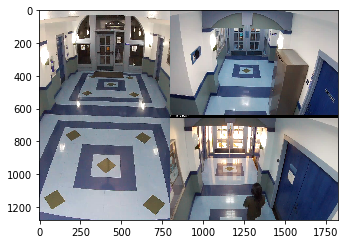

In [56]:
def godd_anex_exit_composite(init_frame_SE,init_frame_NW,init_frame_SW):
    
    scale_percent = 80 # percent of original size
    width = int(init_frame_SW.shape[1] * scale_percent / 100)
    height = int(init_frame_SW.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    resized_sw = cv2.resize(init_frame_SW, dim, interpolation = cv2.INTER_AREA)
    resized_se = cv2.resize(init_frame_SE, dim, interpolation = cv2.INTER_AREA)

    stacked_feed = np.zeros((np.shape(init_frame_NW)[0],np.shape(init_frame_NW)[1]+np.shape(resized_sw)[1],3)).astype(np.uint8)
    stacked_feed[0:np.shape(init_frame_NW)[0],0:np.shape(init_frame_NW)[1]]=init_frame_NW.astype(np.uint8)
    stacked_feed[0:np.shape(resized_sw)[0],np.shape(init_frame_NW)[1]:np.shape(stacked_feed)[1]]=resized_sw.astype(np.uint8)
    stacked_feed[np.shape(resized_sw)[0]:np.shape(stacked_feed)[0],np.shape(init_frame_NW)[1]:np.shape(stacked_feed)[1]]=resized_se.astype(np.uint8)

    return stacked_feed

cap_se = cv2.VideoCapture(r'C:\Users\P Dog\Videos\vlc-record-2021-10-19-16h33m12s-06h09m54s.avi-.mp4')
cap_nw = cv2.VideoCapture(r'F:\Thomas and Brown Data\Goddard Annex N Exit 11_2_2020 4 05 00 AM.avi')
cap_sw = cv2.VideoCapture(r'F:\Thomas and Brown Data\Goddard Annex SW Exit 11_2_2020 4 05 00 AM.avi')
ret, init_frame_SE = cap_se.read()
ret, init_frame_NW = cap_nw.read()
ret, init_frame_SW = cap_sw.read()
plt.imshow(godd_anex_exit_composite(init_frame_SE,init_frame_NW,init_frame_SW))

Two People

In [57]:
def calculate_distance(p1,p2):
    x = p1[0]-p2[0]
    y = p1[1]-p2[1] 
    euclid = np.sqrt(x**2+y**2)
    return euclid
    

In [58]:
def generate_sloped_bound(p1,slope_start,slope_end):
    pass
    
    

In [59]:
print((True and False and True))

False


In [60]:
from shapely.geometry import Polygon
from shapely.geometry import Point

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True


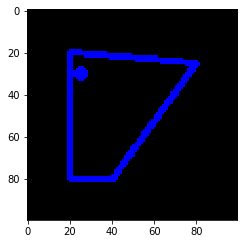

In [61]:

sample = np.zeros((100,100,3))
p1 = (20,20)
p2 = (80,25)
p3 = (40,80)
p4 = (20,80)
coord = (25,30)
poly = [[p1,p2,p3,p4]]

cv2.circle(sample, coord, 2, (0, 0,1), 2)
cv2.line(sample, p1, p2, (0,0,255), thickness)
cv2.line(sample, p2, p3, (0,0,255), thickness)
cv2.line(sample, p3, p4, (0,0,255), thickness)
cv2.line(sample, p4, p1, (0,0,255), thickness)
plt.imshow(sample)

def poly_bound(coord, regions):
    coord = Point(coord)
    for region in regions:
        poly = Polygon(region)
        if poly.contains(coord):
            return True

    return False

print(poly_bound(coord,poly))
    

In [62]:
import pandas as pd
def write_out_data(data, filename):
    print(file_name)
    data.to_csv(filename+' Data.csv',encoding='utf-8',index = False)

In [113]:
class People:

    def __init__(self):
        self.file_name = ''
        self.person = { }
        self.buffer = { }
        self.trajectory = { }
        self.exits = {'main':str()}
        self.hallway = {'main':str()}
        self.rooms = {'':np.array([])}
        self.total = 0
        self.event_total = 0
        self.bound = {}

        self.hall_name = ''
        self.time = []
        self.time_interval = ''
        
    def add_exits(self,bound_coords,name):
        self.exits[name]=bound_coords
    
    def add_hallway(self,bound_coords,name):
        self.hallway[name]=bound_coords
        
    def add_person(self,person_cont):
        self.person[person_cont] = np.array([])
        self.buffer[person_cont] = 0
        self.trajectory[person_cont] = 0

#         self.total += 1

        
    def delete_person(self, person_num):
        self.person.pop(person_num)
        self.buffer.pop(person_num)
        self.trajectory.pop(person_num)

        
    def add_coord_to_person(self, person_num, coords):
        people.person[person_num] = np.append(people.person[person_num],coords)
#         self.calc_total()
    
    def reset_person(self,person_cont):
        self.person[person_cont]= np.array([])



    def calculate_time_interval(self,time_vect):
        total_seconds_array = np.array([])
        for time in time_vect:
            time = time[0]
            time = time.replace('O','0')


            try:

                time_in_seconds = int(time[0]+time[1])*60*60 + int(time[3]+time[4])*60 + int(time[6]+time[7])

            except:
                continue

            total_seconds_array = np.append(total_seconds_array,np.array([time_in_seconds])) 

        if len(total_seconds_array)==0:
            pass
        else:
            # print('Start:',str(datetime.timedelta(seconds=np.min(total_seconds_array))))
            # print('Stop:',str(datetime.timedelta(seconds=np.max(total_seconds_array))))

            return [np.min(total_seconds_array),np.max(total_seconds_array)]




    def process_position(self,location,person_data,i,EXIT,HALLWAY,OFFICE):
        print()
        if self.buffer[i]==7:
            pass
#             self.delete_person(i)


    

        elif(len(person_data)>30):
            tip=''
            tail=''
            p_stop = (int(person_data[-2]), int(person_data[-1]))
            p_start  = (int(person_data[0]), int(person_data[1]))
            for exit in EXIT:
                if poly_bound(p_start, [exit]):
                    tail = 'exit'
                if poly_bound(p_stop, [exit]):
                    tip = 'exit'


            for hall in HALLWAY:
                if poly_bound(p_start, [hall]):
                    tail = 'hall'
                if poly_bound(p_stop, [hall]):
                    tip = 'hall'
                


            for office in OFFICE:
                if poly_bound(p_start, [office]):
                    tail = 'office'
                if poly_bound(p_stop, [office]):
                    tip = 'office'


            
            time_interval = self.calculate_time_interval(self.time)
            print(time_interval)
            # self.time = []
            total_displacment = (person_data[-2]-person_data[0],(person_data[1]-person_data[-1]))

            if total_displacment[0] == 0:
                pass
            elif ((total_displacment[0]<0) or (total_displacment[0]<0)):
                self.trajectory[i]=(np.pi + np.arctan(total_displacment[1]/total_displacment[0]))
            else:
                self.trajectory[i]=(np.arctan(total_displacment[1]/total_displacment[0]))
                if self.trajectory[i]<0:
                    self.trajectory[i]= 2*np.pi + self.trajectory[i]

                        
            data_varibale = location.assign_event(tip,tail,self.hall_name,time_interval)

            self.reset_person(i)
            

        elif(len(person_data)<30):
            self.reset_person(i)

    def process_event(self,person_data):
            pass
                    
#             for keys in self.entrance.keys():
#                     self.bound = 'in'
#                 entrance bound

#             for keys in self.room.keys():
#                 halway bound 
#             self.bound = 'stay'
            


    def calc_total(self):
        lens = np.array([])
        for keys in self.person.keys():
            lens = np.append(lens, len(self.person[keys]))
        self.event_total = len(np.where(lens != 0)[0])
#         for keys in self.person.keys():
#             if (len(self.person[keys]) != 0):
#                 self.total+=1


# #             if self.exit == 'room':
# #                 self.delete_person(person_id)
        
        

In [64]:
str(datetime.timedelta(seconds=(53207)))

'14:46:47'

In [114]:
class LocationHandler:
    def __init__(self):
        self.total_data = pd.DataFrame(columns=['start','stop','known','ambigious','location'])
        self.global_count = 0
        self.ambigious = 0
        self.time = 0
        self.known = 0



    def tally(self):
        self.global_count = self.ambigious + self.known
        # print('Total:',self.global_count)
        # print('Known:',self.known)
        # print('Ambigious:',self.ambigious)



    def assign_event(self, tip, tail,location,time_interval):
        self.known = 0
        self.ambigious = 0
        if (( tail == 'exit' )&(tip == 'hall')):
            self.ambigious =1
            self.known = 0
            print('Entered Hallway: Location Ambigious')

        elif (( tail == 'exit' )&(tip == 'office')):
            self.known =1
            self.ambigious = 0
            print('Entered Office: Quadrent {}'.format(location))


        elif (( tail == 'exit' )&(tip == 'exit')):
            self.ambigious = 0
            self.known = 0
            print('Exit to Exit Transition')

        
        elif (( tail == 'hall' )&(tip == 'hall')):
            self.amibigious = 0
            self.known = 0
            print('Hallway to Hallway Transition')

        elif (( tail == 'hall' )&(tip == 'office')):
            self.ambigious = 0
            self.known =1
            print('Hallway to Office: Quadrent {}'.format(location))

        elif (( tail == 'hall' )&(tip == 'exit')):
            self.ambigious = -1
            self.known = 0
            print('Hall to Exit: Departed')

        elif (( tail == 'office' )&(tip == 'hall')):
            self.known =-1
            self.ambigious =0
            print('Office to Hall: Location Ambigious')


        elif (( tail == 'office' )&(tip == 'office')):
            self.known = 0
            self.ambigious = 0
            print('Office to Office transition: Quadrent {}'.format(location))

        elif (( tail == 'office' )&(tip == 'exit')):
            self.known = -1
            self.ambigious = 0
            print('Office to Exit: Departed')

        else:
            print('Error')



        row=[time_interval[0],time_interval[1],self.known,self.ambigious,location]
        self.total_data.loc[len(self.total_data)]= row
        clear_output(wait=True)
        display(self.total_data)

        
        
        
        
        






In [115]:

from IPython.display import display,clear_output, HTML


In [127]:
#SE Hallway

file_name = r'F:\Goddard Annex Week Final Blurred\Final Data TPR\01 24 22 SE blurred filtered 99 confidence 2'
print(file_name + '.avi')
detection_mat,max_in_frame = interpret_csv_data(r'F:\Goddard Annex Week Final Blurred\CSVs\01 27 22 SE blurred.csv')     
cap = cv2.VideoCapture(r'F:\Goddard Annex Week Final Blurred\SE\01 27 22 SE blurred.avi')

#Grab first and second frame
ret, frame1 = cap.read()
ret, frame2 = cap.read()
empty_frame_count = 0
frame_count = 0
total = 0
path_history = []
people = People()
location = LocationHandler()

pt_A = (300, 300)
pt_B = (150, 770)
pt_C = (800,770)
pt_D = (608, 298)


box_se = [pt_A,pt_B,pt_C,pt_D]

skew_se,M_se_skew = create_skewed_image(intial_frame_se,box_se)
se_map= np.zeros(np.shape(skew_se))


people.file_name = file_name

# 800, 1280
people.hall_name = 'SE'



#Bounding Polygons
SE_EXIT    = [ [(325, 0),(580,0), (580, 325), (325, 325)]]

# SE_OFFICE  = [ [(0,300),(325,300),(275,600),(0,600)] ,
#               [(580,300),(1280,300),(1280,600),(650,600)]  ]
SE_OFFICE  = [ [(0,0),(0,1),(1,1),(1,0)] ]


SE_HALLWAY = [ [(0,326),(1280,326),(1280,801),(0,801)]  ]

while cap.isOpened():
    g_map = cv2.imread(r'C:\Users\P Dog\downloads\map_sample.png')
    min_index = []
    distance = []
    index = []
    pop_index = []
    trans_coords = detection_mat[frame_count][1:]



    # Read detectons and add a person if there are more coords tahn people
    if len(detection_mat[frame_count])>1:
        people.time += [[detection_mat[frame_count][0]]]  
        empty_frame_count = 0
        num_det = len(detection_mat[frame_count])-1

        if num_det > len(people.person):
            people.add_person(num_det-1)

                  
        for i in range(len(trans_coords)):
            people.buffer[i]=0

            people.add_coord_to_person(i,trans_coords[i])
            

            
    # If there is no coordinate for a person increase the buffer by one
        if num_det < len(people.person):
            diff = len(people.person)-num_det
            for k in range(i+1, diff+1):
#                 if len(people.person[k])>0:
#                     people.add_coord_to_person(k, (people.person[k][-2], people.person[k][-1]))
                
                people.buffer[k]+=1             

    # Calculate the distance each point is from the incomming points 
        trans_coords = detection_mat[frame_count][1:]
        for i in range(len(trans_coords)):
            for keys in people.person.keys():
                if len(people.person[keys])> 2:
                    distance += [(calculate_distance((people.person[keys][-4],people.person[keys][-3]), trans_coords[i]))]

    # Create an vector of each distance and grab the index of the closest point
        if (i>0 and len(distance)>1):

            distance = np.array(distance)
            distance = np.split(distance, i+1)
            
            
    # Scan trough a choose a point for a person and make that point invalid for the next person
            for j in range(len(distance)):
                min_index = np.where(distance[j]==np.min(distance[j]))
                current_dex = int(min_index[0][0])
                index += [current_dex]
                for k in range(len(distance)):
                    
                    distance[k][current_dex] = np.infty

                    

    # Reset the buffer if the person receives a point and add the chosen point
            print(index)
            print(people.person)
            
            for i in range(1,len(index)+1):
                if len(index) == len(set(index)):
                    try:
                        people.person[i-1][-1] = trans_coords[index[i-1]][-1]
                        people.person[i-1][-2] = trans_coords[index[i-1]][-2]
                    except:
                        pass
                    
    # Draw an arrow along the path of the person
            


    # Draw a circle at each given point
        for key in people.person.keys():
            if len(people.person[key])>2:
                trans_coord = translate_coord((people.person[key][-2],people.person[key][-1]),M_se_cal,M_se_skew)
                cv2.circle(se_map, trans_coord, 1, (255, 255,0), 2)

        for keys in people.person.keys():
                if len(people.person[keys])>4:
                    p1 = (int(people.person[keys][-4]),int(people.person[keys][-3]))
                    p2 = (int(people.person[keys][-2]),int(people.person[keys][-1]))
                    cv2.circle(frame1, (p2), 5, (0, 255,0), 5)
                    cv2.putText(frame1, '{}'.format(p2), (p2[0]+10,p2[1]-20), cv2.FONT_HERSHEY_SIMPLEX,.75, (0,255,0), 2)
                    p1 = translate_coord(p1, M_se_cal,M_se_skew)
                    p2 = translate_coord(p2, M_se_cal,M_se_skew)
                    cv2.arrowedLine(se_map,p1,p2, (255,255,0), thickness,tipLength = 0.5)
    elif( len(people.person)>0 & len(detection_mat[frame_count])<1 ):
        empty_frame_count +=1
        for keys in people.person.keys():
            people.buffer[keys] += 1
            
    elif(len(detection_mat[frame_count])==1):
        empty_frame_count +=1

            

    # Process the given detections and calc the total
    person_keys = list(people.person.keys())

    if ((empty_frame_count == 20) & (len(people.person)>0)):
        print(frame_count)
        print('processing...')
        print('Calculating Time Interval....')
        # print('decided occupant paths:',people.person)

        for keys in person_keys:
            people.process_position(location,people.person[keys],keys,SE_EXIT,SE_HALLWAY,SE_OFFICE)
            se_map= np.zeros(np.shape(skew_se))
        location.tally()
        
        people.time = []
        

    #Displace the hall and trasformed overhead view
#     frame1 = cv2.GaussianBlur(frame1, (11,11), 5)
    blur1 = cv2.GaussianBlur(frame1, (11,11),7)
    blur2 = cv2.GaussianBlur(frame2, (11,11),7)
    diff = cv2.absdiff(blur1, blur2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray, 15, 150, cv2.THRESH_BINARY)

    # cv2.polylines(frame1,np.int32([SE_OFFICE[0]]), isClosed=True, color=(0,255,0) , thickness = 2)
    # cv2.polylines(frame1,np.int32([SE_OFFICE[1]]), isClosed=True, color=(0,255,0) , thickness = 2)

    # cv2.polylines(frame1,np.int32([SE_HALLWAY]), isClosed=True, color=(255,0,0) , thickness = 2)
    # cv2.polylines(frame1,np.int32([SE_EXIT]), isClosed=True, color=(0,0,255) , thickness = 2)

    # cv2.putText(frame1, 'Office', (p1_se[0]-150,p1_se[1]+250), cv2.FONT_HERSHEY_SIMPLEX, .75, (0,255,0), 2)

    
    # cv2.putText(frame1, 'Exit', p1_se, cv2.FONT_HERSHEY_SIMPLEX, .75, (255,0,0), 2)

    
    # cv2.putText(frame1, 'Office', (p1_se[0]+450,p1_se[1]+250), cv2.FONT_HERSHEY_SIMPLEX, .75, (0,255,0), 2)


    # cv2.putText(frame1, 'Hallway', p2_se, cv2.FONT_HERSHEY_SIMPLEX, .75, (0,0,255), 2)

    
    g_map[310:1020,510:710:] = 255
    g_map[310:1020,510:710:] = g_map[310:1020,510:710:] - cv2.flip(cv2.resize(se_map,( int(200) ,int(710) )),-1)
    

    cv2.imshow("Map 2", g_map.astype(np.uint8))
    cv2.imshow("Thresh", thresh.astype(np.uint8))
    cv2.imshow("Map", cv2.resize(se_map,( int(308*1.5) ,int(800) )))
    cv2.imshow("Feed",frame1)
    
    
    cv2.circle(frame1, (404,271), 10, (255, 0,255), 20)


    #Reset frames
    frame1 = frame2 

    ret, frame2 = cap.read()
    if frame2 is None: 
        cv2.imwrite(r'C:\Users\P Dog\Downloads\se_map_25.png',g_map) 
        for keys in person_keys:

            people.process_position(location,people.person[keys],keys,SE_EXIT,SE_HALLWAY,SE_OFFICE)

        write_out_data(location.total_data,file_name)    

        break    
    frame_count+=1
    


#     if len(people.person)>0:
#         print('buffers person {}:'.format(0),people.buffer[0])q
#     print(people.person)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()


F:\Goddard Annex Week Final Blurred\Final Data TPR\01 24 22 SE blurred filtered 99 confidence 2.avi


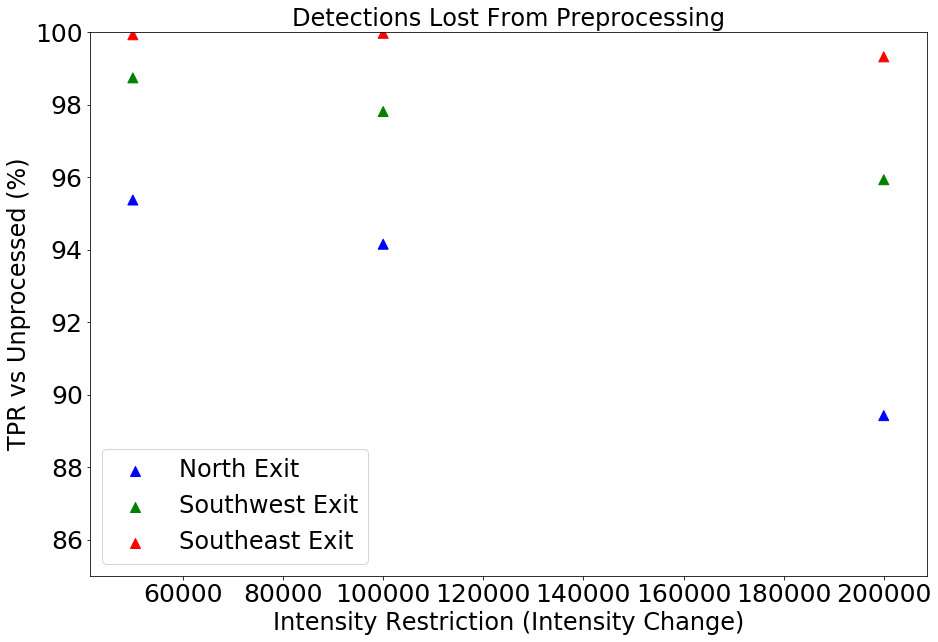

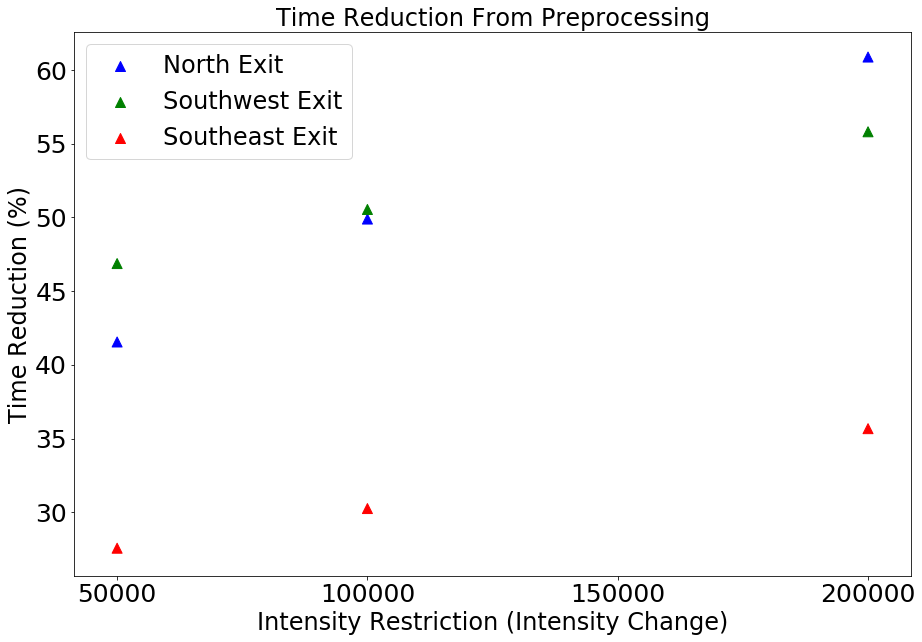

In [55]:


# thresh = np.array(['50000','100000','200000'])
tpr_n = np.array([95.37,94.15,89.42])
tpr_sw = np.array([99.93,99.97,99.32])
tpr_se = np.array([98.74,97.81,95.93])
# fig = plt.figure(figsize=(15,10))

plt.figure(figsize=(15,10))

plt.ylim(85, 100)
plt.scatter(thresh,tpr_n,[100,100,100], color = 'b',marker='^')
plt.scatter(thresh,tpr_se, [100,100,100], color = 'g',marker='^')
plt.scatter(thresh,tpr_sw, [100,100,100], color = 'r',marker='^')

# X = np.arange(3)
# ax = fig.add_axes([0,0,1,1])
# tpr_in = [tpr_sw,tpr_se,tpr_n]
# ax.bar(['50000','100000','200000'], tpr_se, color = 'b', width = 0.25)
# ax.bar(['50000','100000','200000'], tpr_sw, color = 'g', width = 0.25)
# ax.bar(['50000','100000','200000'], tpr_n, color = 'r', width = 0.25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Detections Lost From Preprocessing',fontsize=24)
plt.xlabel('Intensity Restriction (Intensity Change)',fontsize=24)
plt.ylabel('TPR vs Unprocessed (%)',fontsize=24)
plt.legend( ['North Exit', 'Southwest Exit', 'Southeast Exit'],fontsize=24)

thresh = np.array([50000,100000,200000])
time_n = np.array([41.55,49.89,60.88])
time_sw = np.array([27.56,30.25,35.67])
time_se = np.array([46.87,50.54,55.81])
plt.figure(figsize=(15,10))
plt.scatter(thresh,time_n,[500,5001,00], color = 'b',marker='^')
plt.scatter(thresh,time_se, [100,100,100], color = 'g',marker='^')
plt.scatter(thresh,time_sw, [100,100,100], color = 'r',marker='^')
plt.xticks(np.arange(50000,200001, step=50000),fontsize=25)
plt.yticks(fontsize=25)
plt.title('Time Reduction From Preprocessing',fontsize=24)
plt.xlabel('Intensity Restriction (Intensity Change)',fontsize=24)
plt.ylabel('Time Reduction (%)',fontsize=24)
plt.legend( ['North Exit', 'Southwest Exit', 'Southeast Exit'],fontsize=24)
















In [ ]:
cap = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\SW Exit 11.08.2021 Rec 1.avi')


SW_EXIT    = [ [(400, 0),(750,0), (750, 400), (400, 400)]]

SW_OFFICE  = [ [(700,401),(1280,401),(1280,649),(725,649)]  ]

SW_HALLWAY = [ [(0,650),(1280,650),(1280,801),(0,801)]  ]

#Grab first and second frame
ret, intial_frame_sw= cap.read()

cv2.polylines(intial_frame_sw,np.int32([SW_OFFICE]), isClosed=True, color=(0,255,0) , thickness = 2)


cv2.polylines(intial_frame_sw,np.int32([SW_HALLWAY]), isClosed=True, color=(255,0,0) , thickness = 2)
cv2.polylines(intial_frame_sw,np.int32([SW_EXIT]), isClosed=True, color=(0,0,255) , thickness = 2)

plt.figure(figsize=(20,12))

cv2.putText(intial_frame_sw, 'Exit', (405,395), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
cv2.putText(intial_frame_sw, 'Hallway', (p1_se[0]+450,p1_se[1]+250), cv2.FONT_HERSHEY_SIMPLEX, .75, (0,255,0), 2)
cv2.putText(intial_frame_sw, 'Hallway', p2_se, cv2.FONT_HERSHEY_SIMPLEX, .75, (0,0,255), 2)

im = plt.imshow(intial_frame_sw)

Error in callback <function flush_figures at 0x000001761B627C18> (for post_execute):


KeyboardInterrupt: 

F:\Goddard Annex Week Final Blurred\Final Data TPR\01 27 22 SW.avi


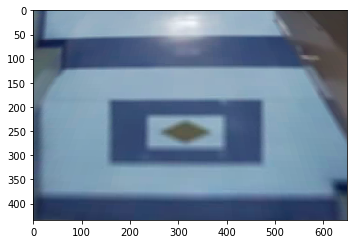

In [112]:
#SW Hallway

file_name = r'F:\Goddard Annex Week Final Blurred\Final Data TPR\01 27 22 SW'
print(file_name + '.avi')
detection_mat,max_in_frame = interpret_csv_data(r'F:\Goddard Annex Week Final Blurred\CSVs\01 27 22 SW blurred.csv')     
cap = cv2.VideoCapture(r'F:\Goddard Annex Week Final Blurred\SW\01 27 22 SW blurred.avi')



#Grab first and second frame
ret, frame1 = cap.read()
ret, frame2 = cap.read()

empty_frame_count = 0
frame_count = 0
total = 0
path_history = []
people = People()
location = LocationHandler()

pt_A = [250, 750]
pt_B = [420, 350]
pt_C = [750,360]
pt_D = [900, 750]


box_sw = [pt_A,pt_B,pt_C,pt_D]
cal_sw,M_sw_cal = calibrate_image(frame1,box_sw)

skew_sw,M_sw_skew = create_skewed_image(cal_sw,box_sw)
sw_map= np.zeros(np.shape(skew_sw))
plt.imshow(skew_sw)

# 800, 1280
people.hall_name = 'SW'



people.file_name = file_name


#Bounding Polygons
SW_EXIT    = [ [(400, 0),(750,0), (750, 400), (400, 400)]]

# SW_OFFICE  = [ [(700,401),(1280,401),(1280,649),(725,649)]  ]
SW_OFFICE  = [ [(0,0),(0,1),(1,1),(1,0)] ]
SW_HALLWAY = [ [(0,400),(1280,400),(1280,801),(0,801)]  ]


while cap.isOpened():

    min_index = []
    distance = []
    index = []
    pop_index = []
    trans_coords = detection_mat[frame_count][1:]



    # Read detectons and add a person if there are more coords tahn people
    if len(detection_mat[frame_count])>1:
        people.time += [[detection_mat[frame_count][0]]]  
        empty_frame_count = 0
        num_det = len(detection_mat[frame_count])-1

        if num_det > len(people.person):
            people.add_person(num_det-1)

                  
        for i in range(len(trans_coords)):
            people.buffer[i]=0

            people.add_coord_to_person(i,trans_coords[i])
            

            
    # If there is no coordinate for a person increase the buffer by one
        if num_det < len(people.person):
            diff = len(people.person)-num_det
            for k in range(i+1, diff+1):
#                 if len(people.person[k])>0:
#                     people.add_coord_to_person(k, (people.person[k][-2], people.person[k][-1]))
                
                people.buffer[k]+=1             

    # Calculate the distance each point is from the incomming points 
        trans_coords = detection_mat[frame_count][1:]
        for i in range(len(trans_coords)):
            for keys in people.person.keys():
                if len(people.person[keys])> 2:
                    distance += [(calculate_distance((people.person[keys][-4],people.person[keys][-3]), trans_coords[i]))]

    # Create an vector of each distance and grab the index of the closest point
        if (i>0 and len(distance)>1):

            distance = np.array(distance)
            distance = np.split(distance, i+1)
            
            
    # Scan trough a choose a point for a person and make that point invalid for the next person
            for j in range(len(distance)):
                min_index = np.where(distance[j]==np.min(distance[j]))
                current_dex = int(min_index[0][0])
                index += [current_dex]
                for k in range(len(distance)):
                    
                    distance[k][current_dex] = np.infty

                    

    # Reset the buffer if the person receives a point and add the chosen point
            for i in range(1,len(index)+1):
                if len(index) == len(set(index)):
                    try:
                        people.person[i-1][-1] = trans_coords[index[i-1]][-1]
                        people.person[i-1][-2] = trans_coords[index[i-1]][-2]
                    except:
                        pass
    # Draw an arrow along the path of the person
            


    # Draw a circle at each given point
        for key in people.person.keys():
            if len(people.person[key])>2:
                trans_coord = translate_coord((people.person[key][-2],people.person[key][-1]),M_sw_cal,M_sw_skew)
                cv2.circle(sw_map, trans_coord, 1, (0, 0,255), 2)

        for keys in people.person.keys():
                if len(people.person[keys])>4:
                    p1 = (int(people.person[keys][-4]),int(people.person[keys][-3]))
                    p2 = (int(people.person[keys][-2]),int(people.person[keys][-1]))
                    p1 = translate_coord(p1, M_sw_cal,M_sw_skew)
                    p2 = translate_coord(p2, M_sw_cal,M_sw_skew)
                    cv2.arrowedLine(sw_map,p1,p2, color, thickness,tipLength = 0.5)
    elif( len(people.person)>0 & len(detection_mat[frame_count])<1 ):
        empty_frame_count +=1
        for keys in people.person.keys():
            people.buffer[keys] += 1
            
    elif(len(detection_mat[frame_count])==1):
        empty_frame_count +=1

            

    # Process the given detections and calc the total
    person_keys = list(people.person.keys())
    if ((empty_frame_count == 20) & (len(people.person)>0)):
        print()
        for keys in person_keys:
            people.process_position(location,people.person[keys],keys,SW_EXIT,SW_HALLWAY,SW_OFFICE)
            sw_map= np.zeros(np.shape(skew_sw))
        location.tally()
        people.time = []
        

    #Displace the hall and trasformed overhead view
#     frame1 = cv2.GaussianBlur(frame1, (11,11), 5)
    cv2.putText(sw_map, 'SW_Hallway', (0, 530), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    cv2.putText(sw_map, 'Total Number of Persons: {}'.format(people.total), (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

    # cv2.polylines(frame1,np.int32([SW_OFFICE]), isClosed=True, color=(0,255,0) , thickness = 2)


    cv2.polylines(frame1,np.int32([SW_HALLWAY]), isClosed=True, color=(255,0,0) , thickness = 2)
    # cv2.polylines(frame1,np.int32([SW_HALLWAY][1]), isClosed=True, color=(255,0,0) , thickness = 2)
    cv2.polylines(frame1,np.int32([SW_EXIT]), isClosed=True, color=(0,0,255) , thickness = 2)
    cv2.polylines(frame1,np.int32([box_sw]), isClosed=True, color=(0,0,255) , thickness = 2)
    cv2.imshow("Feed", frame1.astype(np.uint8))


    cv2.imshow("Map", sw_map)
    cv2.circle(frame1, (404,271), 10, (255, 0,255), 20)


    #Reset frames
    frame1 = frame2 
    ret, frame2 = cap.read()
    if frame2 is None: 
        for keys in person_keys:
            people.process_position(location,people.person[keys],keys,SW_EXIT,SW_HALLWAY,SW_OFFICE)
        write_out_data(location.total_data,file_name)     
        break    
    frame_count+=1


#     if len(people.person)>0:
#         print('buffers person {}:'.format(0),people.buffer[0])

    if cv2.waitKey(10) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

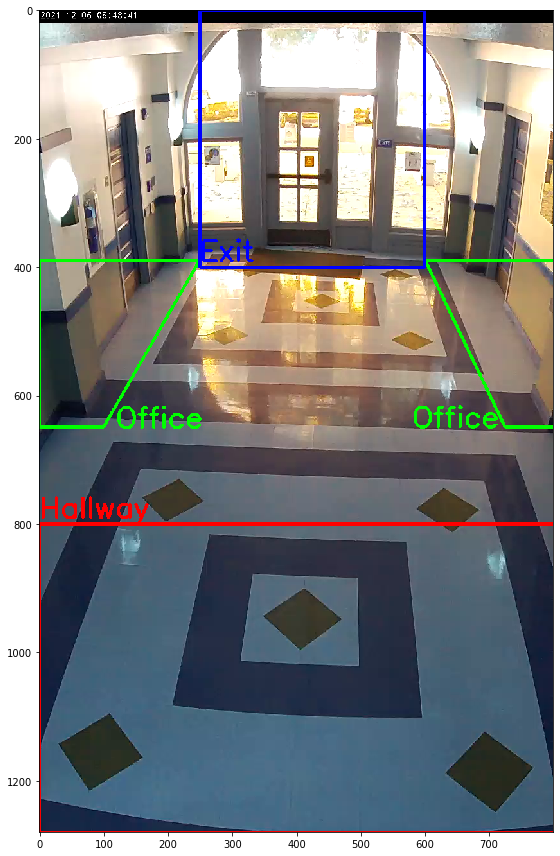

In [ ]:
cap = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\12 6 North .avi')


N_EXIT    = [ [(250, 0),(600,0), (600, 400), (250, 400)]]

N_OFFICE  = [ [(601,390),(1280,390),(1280,649),(725,649)] , 
              [(0,390),(249,390),(100,649),(0,649)]  ]

N_HALLWAY = [ [(0,800),(801,800),(1281,1281),(0,1281)]  ]

#Grab first and second frame
ret, intial_frame_sw= cap.read()

cv2.polylines(intial_frame_sw,np.int32([N_OFFICE[0]]), isClosed=True, color=(0,255,0) , thickness = 3)
cv2.polylines(intial_frame_sw,np.int32([N_OFFICE[1]]), isClosed=True, color=(0,255,0) , thickness = 3)
cv2.polylines(intial_frame_sw,np.int32([N_HALLWAY]), isClosed=True, color=(255,0,0) , thickness = 3)
cv2.polylines(intial_frame_sw,np.int32([N_EXIT]), isClosed=True, color=(0,0,255) , thickness = 3)

plt.figure(figsize=(20,12))
cv2.putText(intial_frame_sw, 'Office', (119,650), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 3)
cv2.putText(intial_frame_sw, 'Exit',  (250, 390), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,255), 3)
cv2.putText(intial_frame_sw, 'Office', (580,649), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 3)
cv2.putText(intial_frame_sw, 'Hallway', (0,790), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0,0), 3)

im = plt.imshow(intial_frame_sw)


In [124]:

file_name = r'F:\Goddard Annex Week Final Blurred\Final Data TPR\01 25 22 N blurred k'
detection_mat,max_in_frame = interpret_csv_data(r'F:\Goddard Annex Week Final Blurred\CSVs\01 27 22 N blurred.csv')     
cap = cv2.VideoCapture(r'F:\Goddard Annex Week Final Blurred\N\01 27 22 N blurred.avi')
g_map = cv2.imread(r'C:\Users\P Dog\downloads\nmap.png')
#Grab first and second frame
ret, frame1 = cap.read()
ret, frame2 = cap.read()
empty_frame_count = 0
frame_count = 0
total = 0
path_history = []
people = People()
location = LocationHandler()


people.hall_name = 'N'
pt_B = [0-300, 1280]
pt_A = [217, 395]
pt_D = [660,403]
pt_C = [793+300, 1280]
box_n = [pt_A,pt_B,pt_C,pt_D]
cal_n,M_n_cal = calibrate_image(frame1,box_n)

skew_n,M_n_skew = create_skewed_image(cal_n,box_n)
n_map= np.zeros(np.shape(skew_n))


#Bounding Polygons
N_EXIT    = [ [(250, 0),(600,0), (600, 400), (250, 400)]]

# N_OFFICE  = [ [(601,390),(1280,390),(1280,649),(725,649)] , 
#               [(0,390),(249,390),(100,649),(0,649)]  ]

N_OFFICE  = [ [(0,0),(0,1),(1,1),(1,0)]  ]

N_HALLWAY = [ [(-1,401),(801,401),(1281,1281),(-1,1281)]  ]

while cap.isOpened():

    min_index = []
    distance = []
    index = []
    pop_index = []
    trans_coords = detection_mat[frame_count][1:]



    # Read detectons and add a person if there are more coords tahn people
    if len(detection_mat[frame_count])>1:
        people.time += [[detection_mat[frame_count][0]]]  
        empty_frame_count = 0
        num_det = len(detection_mat[frame_count])-1

        if num_det > len(people.person):
            people.add_person(num_det-1)

                  
        for i in range(len(trans_coords)):
            people.buffer[i]=0

            people.add_coord_to_person(i,trans_coords[i])
            

            
    # If there is no coordinate for a person increase the buffer by one
        if num_det < len(people.person):
            diff = len(people.person)-num_det
            for k in range(i+1, diff+1):
#                 if len(people.person[k])>0:
#                     people.add_coord_to_person(k, (people.person[k][-2], people.person[k][-1]))
                
                people.buffer[k]+=1             

    # Calculate the distance each point is from the incomming points 
        trans_coords = detection_mat[frame_count][1:]
        for i in range(len(trans_coords)):
            for keys in people.person.keys():
                if len(people.person[keys])> 2:
                    distance += [(calculate_distance((people.person[keys][-4],people.person[keys][-3]), trans_coords[i]))]

    # Create an vector of each distance and grab the index of the closest point
        if (i>0 and len(distance)>1):

            distance = np.array(distance)
            distance = np.split(distance, i+1)
            
            
    # Scan trough a choose a point for a person and make that point invalid for the next person
            for j in range(len(distance)):
                min_index = np.where(distance[j]==np.min(distance[j]))
                current_dex = int(min_index[0][0])
                index += [current_dex]
                for k in range(len(distance)):
                    
                    distance[k][current_dex] = np.infty

                    

    # Reset the buffer if the person receives a point and add the chosen point
            for i in range(1,len(index)+1):
                if len(index) == len(set(index)):
                    try:
                        people.person[i-1][-1] = trans_coords[index[i-1]][-1]
                        people.person[i-1][-2] = trans_coords[index[i-1]][-2]
                    except:
                        pass
                
    # Draw an arrow along the path of the person
            


    # Draw a circle at each given point
        for key in people.person.keys():
            if len(people.person[key])>2:
                trans_coord = translate_coord((people.person[key][-2],people.person[key][-1]),M_n_cal,M_n_skew)
                cv2.circle(n_map, trans_coord, 1, (255, 255,0), 2)

        for keys in people.person.keys():
                if len(people.person[keys])>4:
                    p1 = (int(people.person[keys][-4]),int(people.person[keys][-3]))
                    p2 = (int(people.person[keys][-2]),int(people.person[keys][-1]))
                    p1 = translate_coord(p1, M_n_cal,M_n_skew)
                    p2 = translate_coord(p2, M_n_cal,M_n_skew)
                    cv2.arrowedLine(n_map,p1,p2, (255,255,0), thickness,tipLength = 0.5)
    elif( len(people.person)>0 & len(detection_mat[frame_count])<1 ):
        empty_frame_count +=1
        for keys in people.person.keys():
            people.buffer[keys] += 1
            
    elif(len(detection_mat[frame_count])==1):
        empty_frame_count +=1

            

    # Process the given detections and calc the total
    person_keys = list(people.person.keys())
    if ((empty_frame_count == 20) & (len(people.person)>0)):

        for keys in person_keys:

            people.process_position(location,people.person[keys],keys,N_EXIT,N_HALLWAY,N_OFFICE)
        n_map = np.zeros(np.shape(skew_n))

        location.tally()
        people.time = []
    # mask_frame1 = frame1.copy()
    # mask_frame2 = frame2.copy()
    # mask_frame1[0:125,0:670] = 0
    # mask_frame1[0:200,550:670] = 0
    # mask_frame1[0:200,0:330] = 0        
    # mask_frame2[0:125,0:670] = 0
    # mask_frame2[0:200,550:670] = 0
    # mask_frame2[0:200,0:330] = 0        
    # diff = cv2.absdiff(mask_frame1, mask_frame2)
    # gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    # blur = cv2.GaussianBlur(gray, (15,15), 7)
    # _, thresh = cv2.threshold(blur, 15, 150, cv2.THRESH_BINARY)
    #Displace the hall and trasformed overhead view
#     frame1 = cv2.GaussianBlur(frame1, (11,11), 5)


    # cv2.polylines(frame1,np.int32([N_OFFICE[0]]), isClosed=True, color=(0,255,0) , thickness = 2)
    # cv2.polylines(frame1,np.int32([N_OFFICE[1]]), isClosed=True, color=(0,255,0) , thickness = 2)


    # cv2.polylines(frame1,np.int32([N_HALLWAY]), isClosed=True, color=(255,0,0) , thickness = 2)
    # cv2.polylines(frame1,np.int32([N_EXIT]), isClosed=True, color=(0,0,255) , thickness = 2)
    # cv2.polylines(frame1,np.int32([box_n]), isClosed=True, color=(0,0,255) , thickness = 2)
    cv2.imshow("Feed", frame1.astype(np.uint8))
    # cv2.imshow("Diff",thresh.astype(np.uint8))
    # cv2.imshow("Map", n_map)
    cv2.imshow("Map", g_map)
    mask_frame1 = frame1.copy()
    mask_frame2 = frame2.copy()
    mask_frame1[0:125,300:670] = 0
    mask_frame1[0:200,550:670] = 0
    mask_frame1[0:200,0:330] = 0        
    mask_frame2[0:125,300:670] = 0
    mask_frame2[0:200,550:670] = 0
    mask_frame2[0:200,0:330] = 0  
    
    # blur1 = cv2.GaussianBlur(frame1, (11,11),7)
    # blur2 = cv2.GaussianBlur(frame2, (11,11),7)
    diff = cv2.absdiff(mask_frame1, mask_frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 15, 150, cv2.THRESH_BINARY)

    sumofpix = (np.sum(thresh)/150)
    # cv2.putText(thresh, 'Pixels Changed: {}'.format(int(sumofpix)), (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(thresh, 'Intensity Change: {}'.format(int(sumofpix)*150), (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.imshow("Diff", thresh)
    g_map[100:1500,90:425] = 255
    g_map[100:1500,90:425] = g_map[100:1500,90:425] - (cv2.resize(n_map,( int(335) ,int(770) )))
    #Reset frames
    frame1 = frame2 
    ret, frame2 = cap.read()
    if frame2 is None:      
        for keys in person_keys:
            people.process_position(location,people.person[keys],keys,N_EXIT,N_HALLWAY,N_OFFICE)
        write_out_data(location.total_data,file_name)     
        break    
    frame_count+=1
    


#     if len(people.person)>0:
#         print('buffers person {}:'.format(0),people.buffer[0])

    if cv2.waitKey(20) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

,start,stop,known,ambigious,location
0,24185.0,24212.0,0,0,N
1,24185.0,24212.0,0,0,N
2,24218.0,24226.0,0,0,N
3,24218.0,24226.0,0,0,N
4,27361.0,27368.0,0,1,N
5,34340.0,34347.0,0,1,N
6,34954.0,34963.0,0,-1,N
7,39928.0,39935.0,0,1,N
8,47768.0,47774.0,0,1,N
9,47873.0,47880.0,0,1,N


['01 27 22 N blurred Data.csv', '01 27 22 SE blurred Data.csv', '01 27 22 SW blurred Data.csv']
       start     stop  known  ambigious location
0    23729.0  23735.0      0          0       SE
1    23729.0  23735.0      0          1       SE
2    23899.0  23945.0      0          0       SE
3    23899.0  23945.0      0          0       SE
4    23949.0  23961.0      0          0       SE
5    23949.0  23961.0      0          0       SE
6    24185.0  24212.0      0          0        N
7    24185.0  24212.0      0          0        N
8    24218.0  24226.0      0          0        N
9    24218.0  24226.0      0          0        N
10   24289.0  24291.0      0          0       SW
11   24324.0  24328.0      0          0       SW
12   24345.0  24355.0      0         -1       SW
13   24345.0  24355.0      0          0       SW
14   24360.0  24366.0      0          1       SW
15   24492.0  24500.0      0         -1       SE
16   24492.0  24500.0      0         -1       SE
17   27361.0  27368.0 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



Occupancy Invalid Low: Resetting Count
Occupancy Invalid Low: Resetting Count
Occupancy Invalid Low: Resetting Count
Occupancy Invalid Low: Resetting Count
Occupancy Invalid Low: Resetting Count
Occupancy Invalid Low: Resetting Count
Occupancy Invalid Low: Resetting Count


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

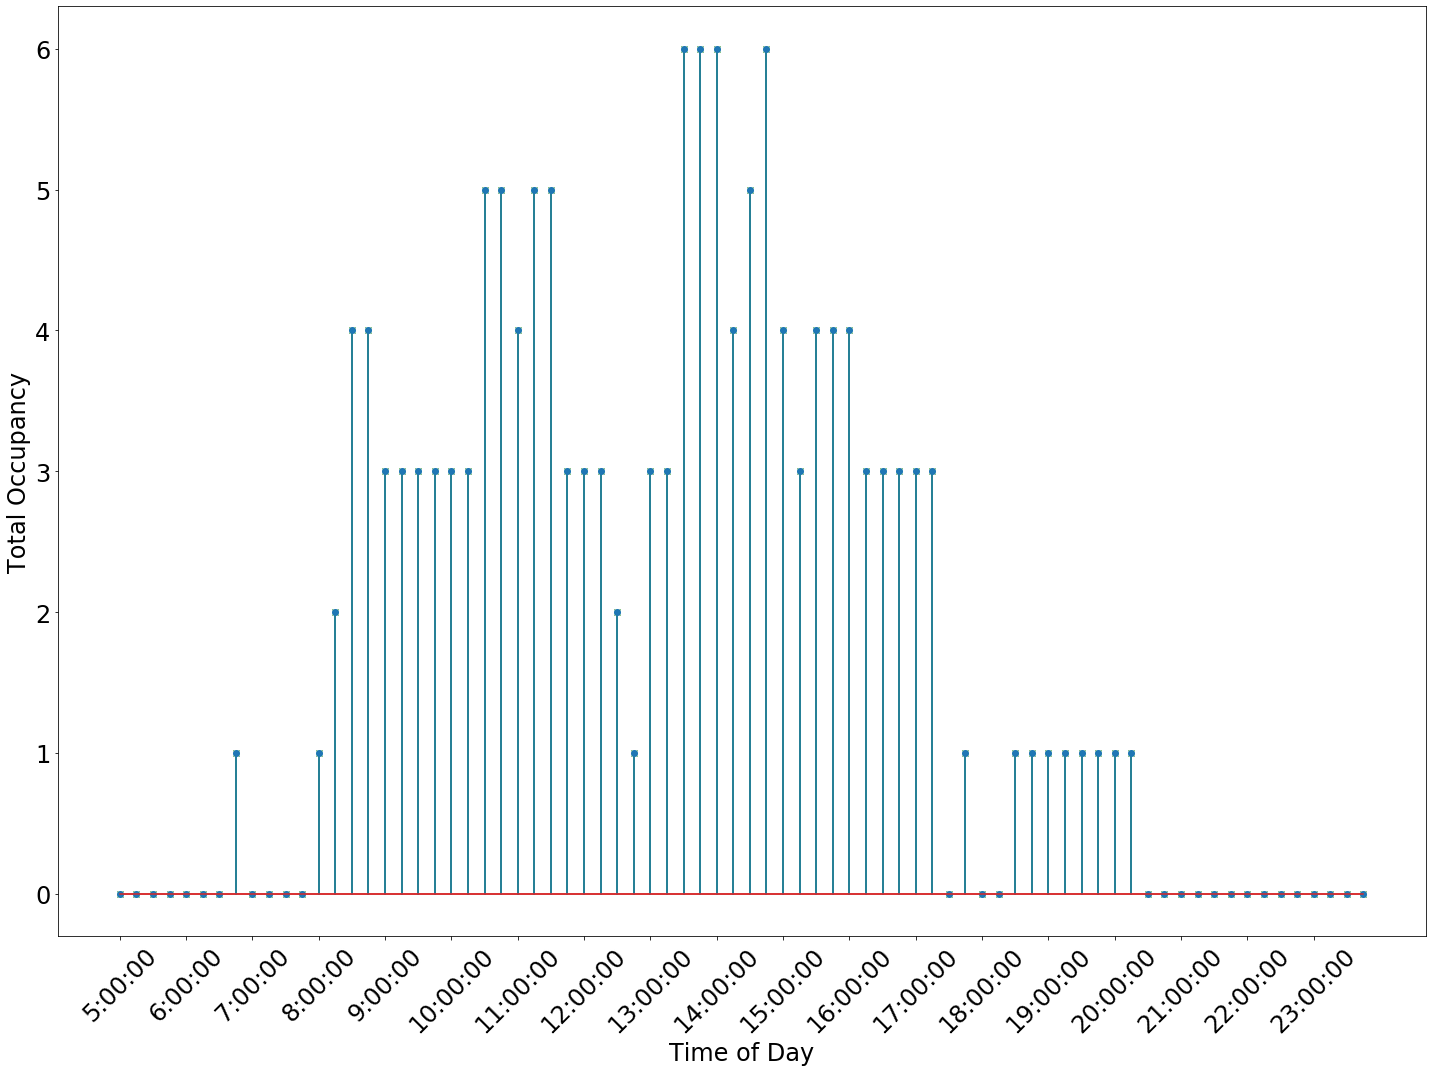

In [81]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

plt.figure(figsize=(20,15))
directory = os.listdir(r'F:\Goddard Annex Week Final Blurred\Final Data Output\01 27 22')
all_events = pd.DataFrame({})
print(directory)
for hallway_event in directory:

    event = pd.read_csv(r'F:\Goddard Annex Week Final Blurred\Final Data Output\01 27 22/' + hallway_event)
    
    all_events = all_events.append(event)
all_events = all_events.sort_values(by=['start'])
all_events = all_events.reset_index(drop = True )


print(all_events)
time_change = all_events.copy()
for i in range(len(time_change['start'])):
    time_change['start'].iloc[i] = str(datetime.timedelta(seconds=time_change['start'].iloc[i]))
for i in range(len(time_change['stop'])):
    time_change['stop'].iloc[i] = str(datetime.timedelta(seconds=time_change['stop'].iloc[i]))

x = 0

intial_time = all_events['start'][0]
print(str(datetime.timedelta(seconds=all_events['start'][0])))
for i in range(len(all_events['ambigious'])):
    
    x = x  + (all_events['ambigious'][i])

    print('Time :', str(datetime.timedelta(seconds=all_events['start'][i])) , 'Occupancy:',x)

y_axis = [] 
x_axis = []

for i in range(18000,86400,900):
    w = (np.where(all_events['start']<i))

    x = 0
    for j in w[0]:
        if x  + (all_events['ambigious'][j]) <0:
            print('Occupancy Invalid Low: Resetting Count')
        else:
            x = x  + (all_events['ambigious'][j])

            
    y_axis += [x]
    x_axis += [str(datetime.timedelta(seconds=i))]

plt.stem(x_axis,y_axis,'g',markerfmt='gx', label='Unrestricted Confidence')






# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(os.listdir(r'F:\Goddard Annex Week Final\Final Data Output'))

# directory = os.listdir(r'F:\Goddard Annex Week Final Blurred\Final Data Output\01 24 22')
# all_events = pd.DataFrame({})
# for hallway_event in directory:

#     event = pd.read_csv(r'F:\Goddard Annex Week Final Blurred\Final Data Output\01 24 22/' + hallway_event)
    
#     all_events = all_events.append(event)
# all_events = all_events.sort_values(by=['start'])
# all_events = all_events.reset_index(drop = True )


# print(all_events)

# x = 0

# intial_time = all_events['start'][0]
# print(str(datetime.timedelta(seconds=all_events['start'][0])))
# for i in range(len(all_events['ambigious'])):
    
#     x = x  + (all_events['ambigious'][i])

#     print('Time :', str(datetime.timedelta(seconds=all_events['start'][i])) , 'Occupancy:',x)

# y_axis = [] 
# x_axis = []

# for i in range(18000,86400,900):
#     w = (np.where(all_events['start']<i))

#     x = 0
#     for j in w[0]:
#         if x  + (all_events['ambigious'][j]) <0:
#             print('Occupancy Invalid Low: Resetting Count')
#         else:
#             x = x  + (all_events['ambigious'][j])
#         print(x)
            
#     y_axis += [x]
#     x_axis += [str(datetime.timedelta(seconds=i))]
# all_events_copy = all_events.copy()

plt.xticks(rotation = 45,fontsize=24)
plt.xticks(np.arange(0, 76, step=4))
plt.yticks(fontsize=24)
plt.xlabel('Time of Day',fontsize=24)
plt.ylabel('Total Occupancy',fontsize=24)
plt.stem(x_axis,y_axis, label='Restricted Confidence: 0.97')




In [ ]:
(86400-18000)/900

76.0

In [129]:
import pandas as pd
import datetime
import numpy as np
def create_occupancy_plot(day_file):

    pd.set_option("display.max_rows", None, "display.max_columns", None)


    directory = os.listdir(day_file)

    all_events = pd.DataFrame({})
    for hallway_event in directory:
        event = pd.read_csv(day_file + '/' + hallway_event)
        all_events = all_events.append(event)

    all_events = all_events.sort_values(by=['start'])
    all_events = all_events.reset_index(drop = True )



    x = 0
    if len(all_events) == 0:
        row=[0,0,0,0,'Void']
        all_events.loc[0]= row


    y_axis = [] 
    x_axis = []

    for i in range(18000,86400,900):
        w = (np.where(all_events['start']<i))
        x = 0
        for j in w[0]:
            if x  + (all_events['ambigious'][j]) <0:
                pass
            else:
                x = x  + (all_events['ambigious'][j])



        y_axis += [x]
        x_axis += [str(datetime.timedelta(seconds=i))]

    return y_axis, x_axis




    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a

IndexError: list index out of range

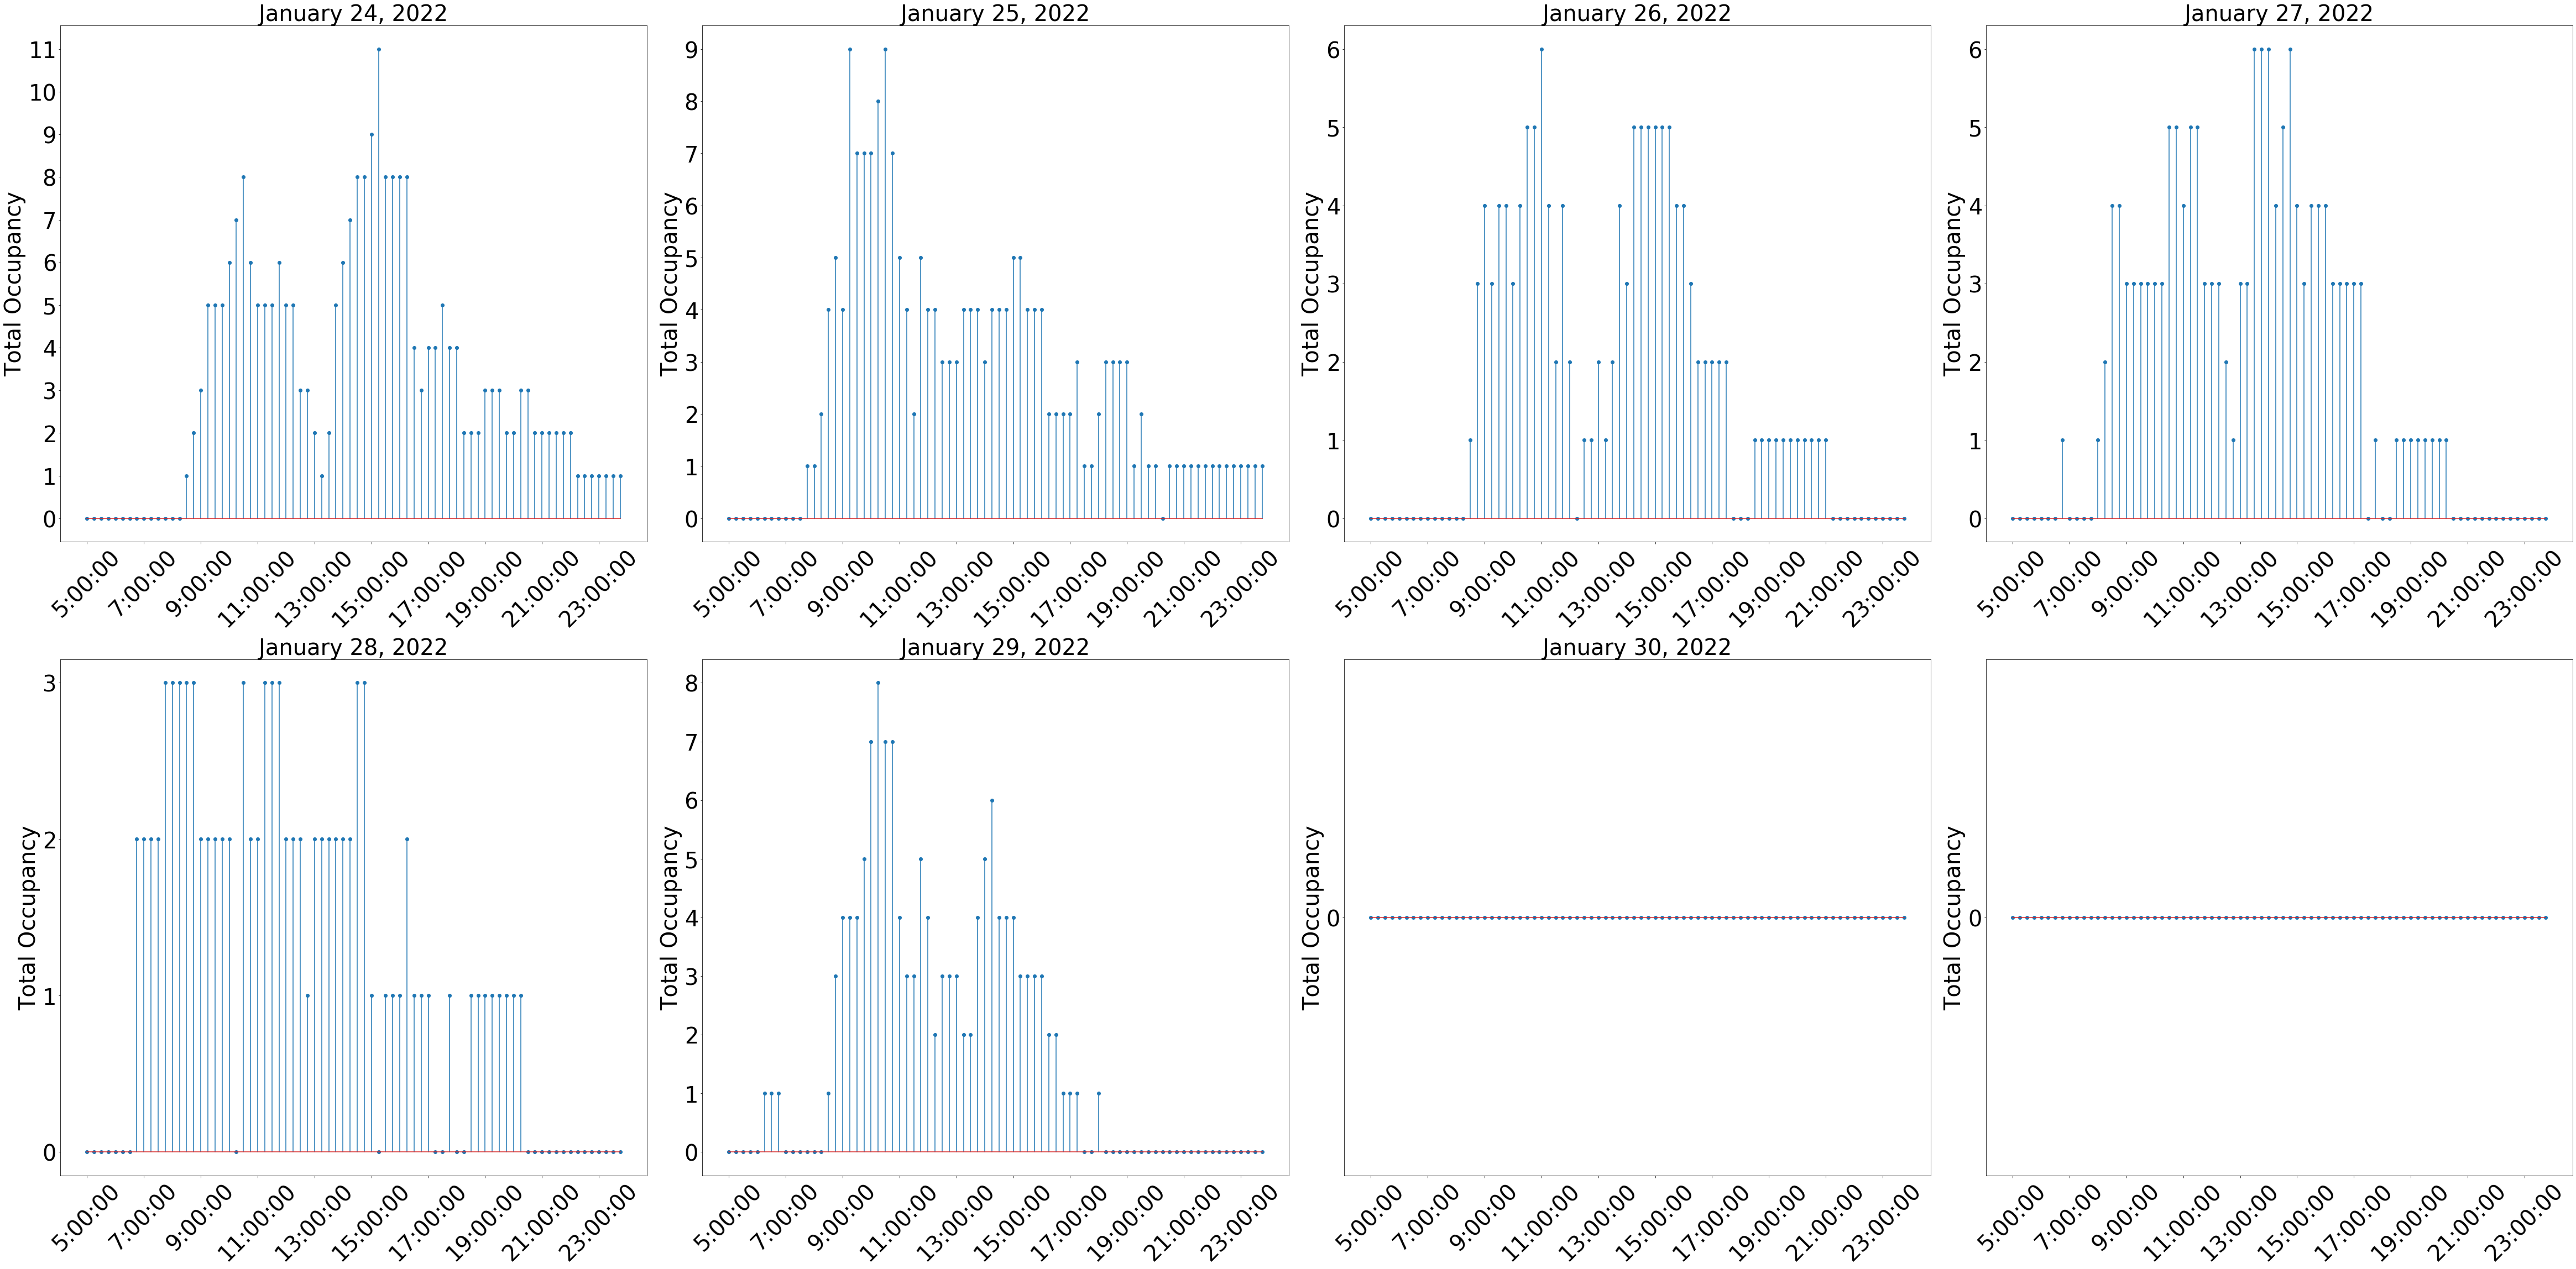

In [130]:
plt.figure(figsize=(65,32))
day_array = ['January 24, 2022','January 25, 2022','January 26, 2022','January 27, 2022','January 28, 2022','January 29, 2022','January 30, 2022',]
i =1
for day in os.listdir(r'F:\Goddard Annex Week Final Blurred\Final Data Output'):
    plt.subplot(2,4,i)
    y_axis, x_axis = create_occupancy_plot(r'F:\Goddard Annex Week Final Blurred\Final Data Output/' + day)
    plt.xticks(rotation = 45,fontsize=40)
    plt.xticks(np.arange(0, 76, step=8))
    plt.yticks(np.arange(0,12, step=1),fontsize=40)
    plt.ylabel('Total Occupancy',fontsize=40)
    plt.stem(x_axis,y_axis)
    plt.title(day_array[i-1],fontsize=40)
    i+=1

In [ ]:
import pandas as pd
import datetime
import numpy as np


def heat_map(day_file):
    godd_map = cv2.imread(r'F:\Thomas and Brown Data\goddard floor plan.png')
    godd_marked = godd_map.copy()
    pd.set_option("display.max_rows", None, "display.max_columns", None)


    circle_scale = 10
    alpha = 0.5 # Transparency factor.   
    image_new = godd_map.copy()
    directory = os.listdir(day_file)
    print(directory)
    se_rad_in = 0
    se_rad_out = 0
    sw_rad_in = 0
    sw_rad_out = 0
    n_rad_in = 0
    n_rad_out = 0    
    for hallway_event in directory:

        all_events = pd.DataFrame({})
        event = pd.read_csv(day_file + '/' + hallway_event)
        all_events = all_events.append(event)


        all_events = all_events.sort_values(by=['start'])
        all_events = all_events.reset_index(drop = True )


        in_oc = 0
        out_oc = 0
        if len(all_events) == 0:
            row=[0,0,0,0,'Void']
            all_events.loc[0]= row
        for occ in all_events['ambigious']:
            if occ == 1:
                in_oc +=1
            if occ == -1:
                out_oc +=1

        


        if all_events['location'][0] == 'N':
            n_rad_in = in_oc
            n_rad_out = out_oc
            if in_oc > out_oc:
                cv2.circle(godd_marked, (1065,200), in_oc*circle_scale, (0, 0, 255), -1)
                cv2.circle(godd_marked, (1070,200), out_oc*circle_scale, (255, 0, 0), -1)

            else:
                cv2.circle(godd_marked, (1065,200), out_oc*circle_scale, (255, 0, 0), -1)
                cv2.circle(godd_marked, (1065,200), in_oc*circle_scale, (0, 0, 255), -1)



        if all_events['location'][0] == 'SE':
            se_rad_in = in_oc
            se_rad_out = out_oc
            if in_oc > out_oc:

                cv2.circle(godd_marked, (1505,700), in_oc*circle_scale, (0, 0, 255), -1)
                cv2.circle(godd_marked, (1505,700), out_oc*circle_scale, (255, 0, 0), -1)
            else:
                cv2.circle(godd_marked, (1505,700), out_oc*circle_scale, (255, 0, 0), -1)
                cv2.circle(godd_marked, (1505,700), in_oc*circle_scale, (0, 0, 255), -1)


        if all_events['location'][0] == 'SW':
            sw_rad_in = in_oc
            sw_rad_out = out_oc
            if in_oc > out_oc:
                cv2.circle(godd_marked, (930,700), in_oc*circle_scale, (0, 0, 255), -1)
                cv2.circle(godd_marked, (930,700), out_oc*circle_scale, (255, 0, 0), -1)
            else: 
                cv2.circle(godd_marked, (930,700), out_oc*circle_scale, (255, 0, 0), -1)
                cv2.circle(godd_marked, (930,700), in_oc*circle_scale, (0, 0, 255), -1)



    image_new = cv2.addWeighted(godd_marked, alpha, image_new, 1 - alpha, 0)
    

    rgb_im = image_new.copy()
    rgb_im[:,:,0] = image_new[:,:,2]
    rgb_im[:,:,2] = image_new[:,:,0]
    cv2.putText(rgb_im, 'Key:', (0,20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),2)
    cv2.putText(rgb_im, 'Red: Entry', (0,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    cv2.putText(rgb_im, 'Blue: Exit', (0,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)
    cv2.putText(rgb_im, 'In: {}'.format(n_rad_in), (1065,230+np.max([n_rad_out,n_rad_in])*circle_scale), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    cv2.putText(rgb_im, 'Out: {}'.format(n_rad_out), (1065,255+np.max([n_rad_out,n_rad_in])*circle_scale),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)
    cv2.putText(rgb_im, 'In: {}'.format(se_rad_in), (1505,720+np.max([se_rad_out,se_rad_in])*circle_scale), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    cv2.putText(rgb_im, 'Out: {}'.format(se_rad_out), (1505,745+np.max([se_rad_out,se_rad_in])*circle_scale),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)
    cv2.putText(rgb_im, 'In: {}'.format(sw_rad_in), (930,720+np.max([sw_rad_out,sw_rad_in])*circle_scale), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    cv2.putText(rgb_im, 'Out: {}'.format(sw_rad_out), (930,745+np.max([sw_rad_out,sw_rad_in])*circle_scale),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)
    return rgb_im


['01 27 22 N blurred Data.csv', '01 27 22 SE blurred Data.csv', '01 27 22 SW blurred Data.csv']


(-0.5, 1784.5, 990.5, -0.5)

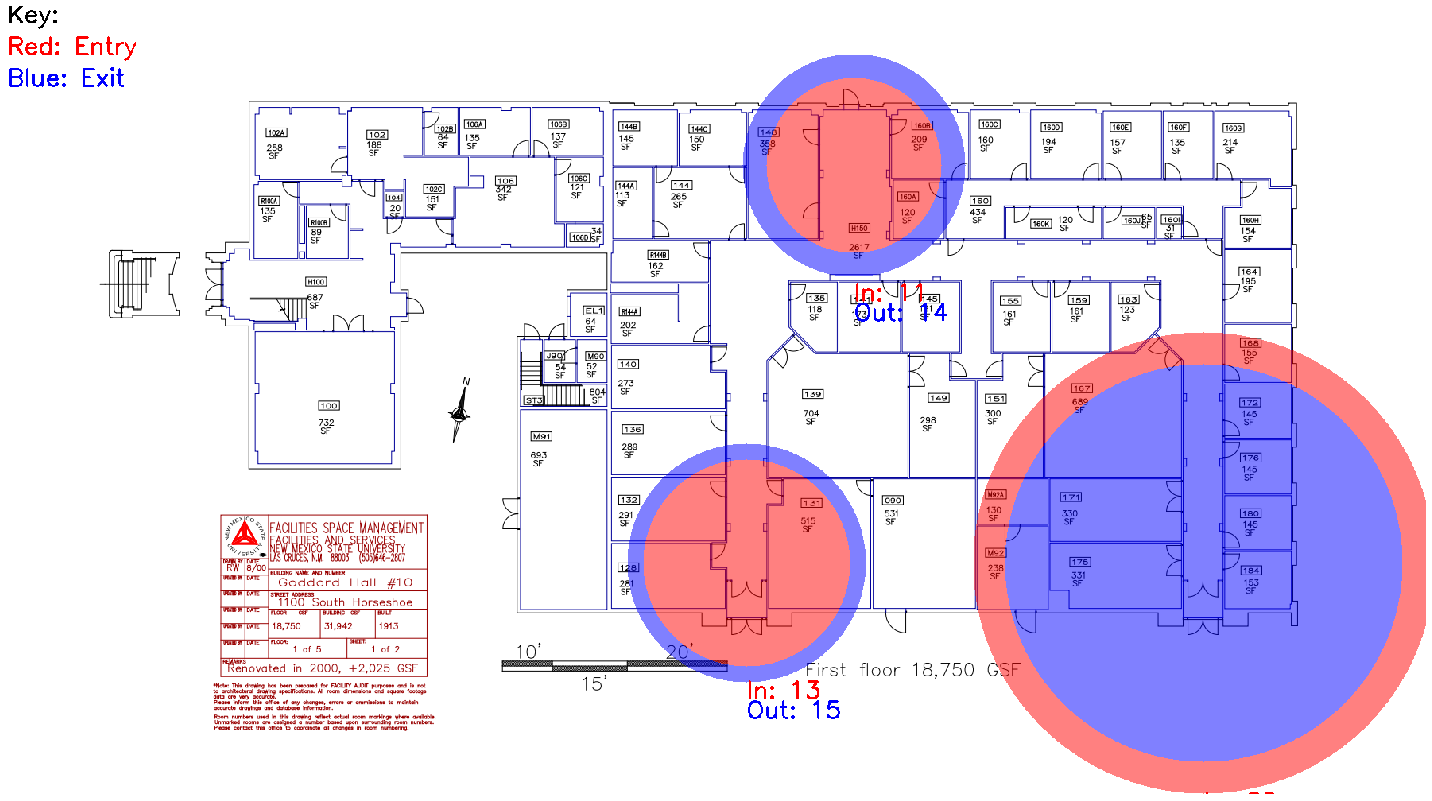

In [ ]:

day_file = r'F:\Goddard Annex Week Final Blurred\Final Data Output\01 27 22'
plt.figure(figsize=(20,15))
i = heat_map(day_file)
plt.imshow(i);plt.axis('off')


In [ ]:

def create_occupancy_plot_single_day(day_file):

    pd.set_option("display.max_rows", None, "display.max_columns", None)


    

    all_events = pd.DataFrame({})
    
    event = pd.read_csv(day_file)
    all_events = all_events.append(event)

    all_events = all_events.sort_values(by=['start'])
    all_events = all_events.reset_index(drop = True )



    x = 0
    if len(all_events) == 0:
        row=[0,0,0,0,'Void']
        all_events.loc[0]= row



    # intial_time = all_events['start'][0]

    y_axis = [] 
    x_axis = []



    w = (np.where(all_events['ambigious']<=1))

    for j in w[0]:
        event_time = all_events['start'][j]

        x_axis += [str(datetime.timedelta(seconds=event_time))]
        y_axis += [all_events['ambigious'][j]]

    for time in all_events['start']:
        repeated = np.where(time == all_events['start'])[0]

        if len(repeated)>1:
            for index in repeated:
                print(index)
                print(x_axis[index])

            


    return y_axis, x_axis




    


       start      stop  known  ambigious location
0    6:23:00   6:23:05      0         -1       SE
1    6:23:16   6:23:20      0          1       SE
2    8:21:25   8:21:30      0          1       SE
3    8:36:09   8:36:13      0          1       SE
4    9:06:14   9:06:18      0          1       SE
5    9:18:35   9:18:40      0         -1       SE
6    9:24:45   9:24:49      0          1       SE
7   10:52:51  10:52:58      0         -1       SE
8   12:15:34  12:15:42      0         -1       SE
9   12:23:28  12:23:37      0         -1       SE
10  12:51:35  12:51:39      0          1       SE
11  13:31:22  13:31:26      0          1       SE
12  13:40:00  13:40:07      0         -1       SE
13  13:46:28  13:46:32      0          1       SE
14  13:50:34  13:50:45      0         -1       SE
15  14:05:56  14:06:01      0          1       SE
16  14:19:57  14:20:03      0          1       SE
17  14:53:48  14:53:55      0         -1       SE
18  14:55:08  14:55:16      0          1       SE


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4
10:55:41
5
10:55:41
4
10:55:41
5
10:55:41
6
10:58:50
7
10:58:50
6
10:58:50
7
10:58:50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



<StemContainer object of 3 artists>

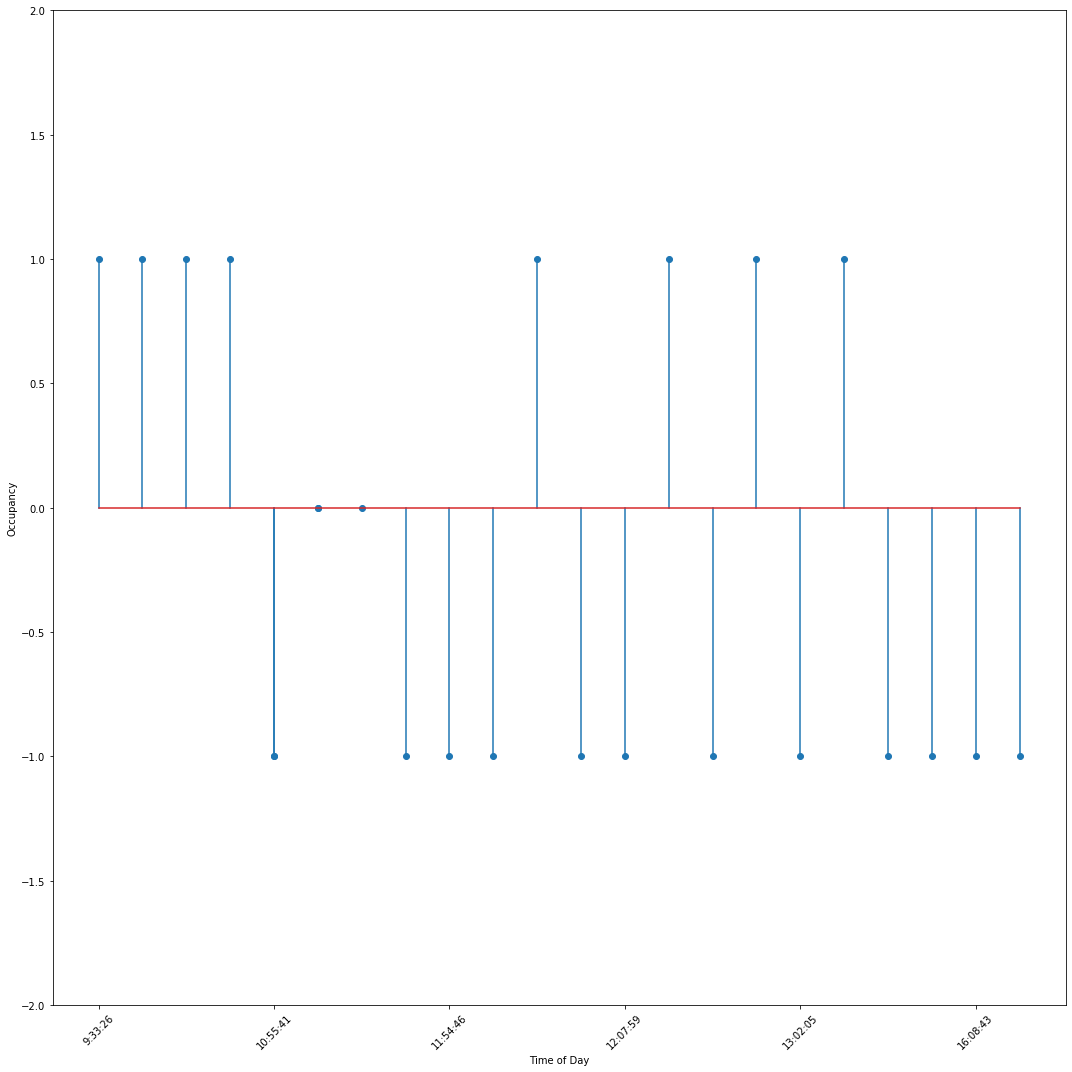

In [ ]:
day_file = r'F:\Goddard Annex Week Final Blurred\Final Data Output\01 28 22\01 28 22 N blurred Data.csv'
y_axis, x_axis = create_occupancy_plot_single_day(day_file)

plt.figure(figsize=(15,15))
plt.xticks(rotation = 45)
plt.xlabel('Time of Day')
plt.xticks(np.arange(0, 76, step=4))
plt.ylabel('Occupancy')
plt.ylim([-2,2])
plt.stem(x_axis,y_axis)

In [ ]:
import pytesseract
def get_time_stamp(frame):
  time_region = frame[0:20,85:160,0]
  thresh = 127
  im_bw = cv2.threshold(time_region, thresh, 255, cv2.THRESH_BINARY)[1]
  kernel = np.ones((2,2),np.uint8)
  dilation = cv2.dilate(time_region,kernel,iterations = 1)
  dilation = cv2.threshold(dilation, thresh, 255, cv2.THRESH_BINARY)[1]
  string = pytesseract.image_to_string(np.max(dilation)-dilation)
  return string[0:-2]

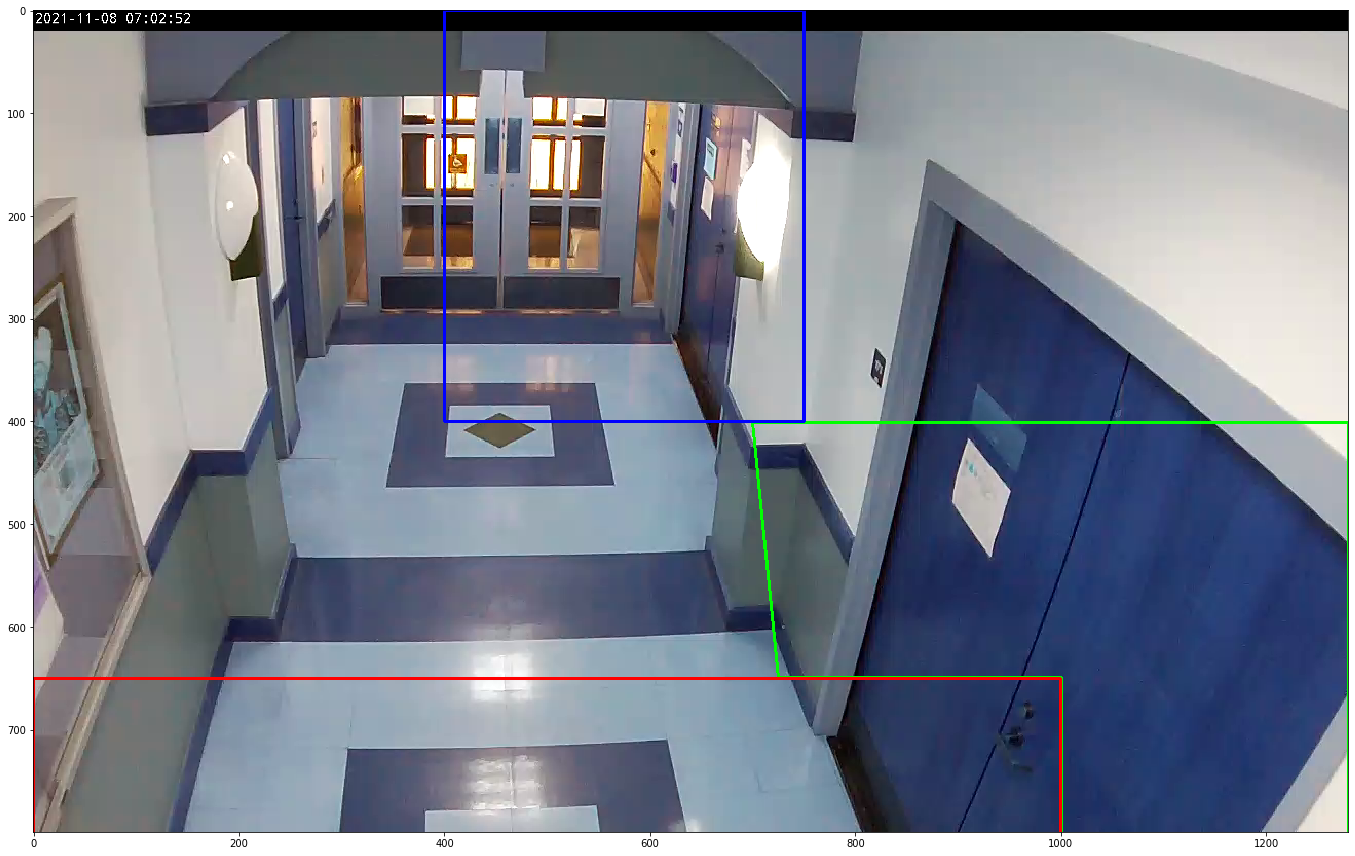

In [ ]:
cap = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\SE Exit 11.08.2021 Rec 1.avi')


SW_EXIT    = [ [(400, 0),(750,0), (750, 400), (400, 400)]]

SW_OFFICE  = [ [(700,401),(1280,401),(1280,801),(1001,801),(1001,649),(725,649)]  ]

SW_HALLWAY = [ [(0,650),(1000,650),(1000,801),(0,801)]  ]

#Grab first and second frame
ret, intial_frame_sw= cap.read()

cv2.polylines(intial_frame_sw,np.int32([SW_OFFICE]), isClosed=True, color=(0,255,0) , thickness = 2)


cv2.polylines(intial_frame_sw,np.int32([SW_HALLWAY]), isClosed=True, color=(255,0,0) , thickness = 2)
cv2.polylines(intial_frame_sw,np.int32([SW_EXIT]), isClosed=True, color=(0,0,255) , thickness = 2)

plt.figure(figsize=(20,12))
im = plt.imshow(intial_frame_sw)
# print(get_time_stamp(intial_frame_sw))

In [89]:
#SE Hallway

cap1 = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\11 9 se.avi')
cap2 = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\11 9 n.avi')
cap3 = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\11 9 sw.avi')

#Grab first and second frame

ret, frame1_cap1 = cap1.read()
ret, frame2_cap1 = cap1.read()

ret, frame1_cap2 = cap2.read()
ret, frame2_cap2 = cap2.read()

ret, frame1_cap3 = cap3.read()
ret, frame2_cap3 = cap3.read()

frame_count = 0
total = 0

while cap1.isOpened():

    stacked_feed = godd_anex_exit_composite((frame1_cap1),(frame1_cap2),(frame1_cap3))
    cv2.putText(stacked_feed, 'Exits', (0, 530), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    cv2.imshow("Live Feed", stacked_feed.astype(np.uint8))

    #Reset frames
    frame1_cap1 = frame2_cap1 
    frame1_cap2 = frame2_cap2 
    frame1_cap3 = frame2_cap3 
    
    ret, frame2_cap1 = cap1.read()   
    ret, frame2_cap2 = cap2.read()   
    ret, frame2_cap3 = cap3.read()   
    
    frame_count+=1
    if frame2_cap1 is None:
        break
    if cv2.waitKey(40) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
#SE Hallway

cap1 = cv2.VideoCapture(r'C:\Users\P Dog\Videos\sample.mp4')
cap2 = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\11 9 n.avi')
cap3 = cv2.VideoCapture(r'C:\Users\P Dog\Downloads\11 9 sw.avi')

#Grab first and second frame

ret, frame1_cap1 = cap1.read()
ret, frame2_cap1 = cap1.read()

ret, frame1_cap2 = cap2.read()
ret, frame2_cap2 = cap2.read()

ret, frame1_cap3 = cap3.read()
ret, frame2_cap3 = cap3.read()

frame_count = 0
total = 0

while cap1.isOpened():
    mask_frame1 = frame1_cap1.copy()
    mask_frame2 = frame2_cap1.copy()
    mask_frame1[0:125,300:670] = 0
    mask_frame1[0:200,550:670] = 0
    mask_frame1[0:200,0:330] = 0        
    mask_frame2[0:125,300:670] = 0
    mask_frame2[0:200,550:670] = 0
    mask_frame2[0:200,0:330] = 0   
    # stacked_feed = godd_anex_exit_composite((frame1_cap1),(frame1_cap2),(frame1_cap3))
    # cv2.putText(stacked_feed, 'Exits', (0, 530), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    cv2.imshow("Live Feed", mask_frame1.astype(np.uint8))

    #Reset frames
    frame1_cap1 = frame2_cap1 
    frame1_cap2 = frame2_cap2 
    frame1_cap3 = frame2_cap3 
    
    ret, frame2_cap1 = cap1.read()   
    ret, frame2_cap2 = cap2.read()   
    ret, frame2_cap3 = cap3.read()   
    
    frame_count+=1
    # if frame2_cap1 is None:
    #     break
    if cv2.waitKey(40) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
# import cv2
# import numpy as np


# os.listdir(r'F:\Goddard Annex Week Final\SE')
# for dir in os.listdir(r'F:\Goddard Annex Week Final\SE'):
#     name = dir.split('.')[0]
#     file_type = dir.split('.')[1]
#     source = r'F:\Goddard Annex Week Final\SE/' + name +'.' + file_type
#     target = r'F:\Goddard Annex Week Final Blurred\SE/'  +  name +' blurred.' + file_type
#     print('Source:', source)
#     print('Target:', target)

#     # Create a VideoCapture object
    
#     cap = cv2.VideoCapture(source)

#     frame_width = int(cap.get(3))
#     frame_height = int(cap.get(4))

#     # Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
#     out = cv2.VideoWriter(target,cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
#     ret, frame1 = cap.read()
#     ret, frame2 = cap.read()

#     while cap.isOpened():
#         blur = cv2.GaussianBlur(frame1, (11,11),7)
#         blur[0:25,:,:] = frame1[0:25,:,:]
#             # Write the frame into the file 'output.avi'


        
#         out.write(blur)

#         frame1 = frame2 
#         ret, frame2 = cap.read()
        

#         if frame2 is None:
#             break


#     # When everything done, release the video capture and video write objects
#     cap.release()
#     out.release()

#     # Closes all the frames
#     cv2.destroyAllWindows()

Source: F:\Goddard Annex Week Final\SE/01 25 22 SE.avi
Target: F:\Goddard Annex Week Final Blurred\SE/01 25 22 SE blurred.avi


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np


cap = cv2.VideoCapture(r'F:\Goddard Annex Week Final Blurred\N\02 20 22 N.avi')


# frame_width = int(cap.get(3))
# frame_height = int(cap.get(4))

# # Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
# out = cv2.VideoWriter(r'F:\Goddard Annex Week Final blurred\N\01 29 22 N blurred.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    blur = cv2.GaussianBlur(frame1, (11,11),7)

    blur[0:25,:,:] = frame1[0:25,:,:]
        # Write the frame into the file 'output.avi'


    
    cv2.imshow('feed',blur.astype(np.uint8))
    cv2.imshow('feed2',frame1.astype(np.uint8))
    frame1 = frame2 
    ret, frame2 = cap.read()


    if frame2 is None:
        break

    if cv2.waitKey(40) == ord('q'):
        break   

# When everything done, release the video capture and video write objects
cap.release()


# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
from math import isnan

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
ss1 = r'F:\Goddard Annex Week Final Blurred\CSV tpr\01 24 22 N blurred filtered 0 confidence.csv'
ss2 = r'F:\Goddard Annex Week Final Blurred\CSV tpr\01 24 22 N blurred Unfiltered.csv'
locations_filt = pd.DataFrame({ss1})
locations_no_filt = pd.DataFrame({ss2})
event = pd.read_csv(ss1)
locations_filt = locations_filt.append(event)
locations_filt.fillna('')
event_2 = pd.read_csv(ss2)
locations_no_filt = locations_no_filt.append(event_2)
locations_no_filt.fillna('')

x = np.array(locations_no_filt)[:,2:]
y = np.array(locations_filt)[:,2:]
# y = np.array(locations_filt['B']iloc[:])


for i in range(len(x)):
    for j in range(len(x[0])):

        if type(x[i,j]) == float:
            x[i,j] = 0
for i in range(len(y)):
    for j in range(len(y[0])):

        if type(y[i,j]) == float:
            y[i,j] = 0

print(np.shape(x),np.shape(y))


tp=0
tn=0
fn=0
fp=0
file_length = np.min([len(x),len(y)])
file_width = np.min([len(x[0]),len(y[0])])
for i in range(file_length):
    for j in range(len(y[0])):
        if ((x[i,j] != 0) and (y[i,j] != 0)):
            tp +=1
        if ((x[i,j] == 0) and (y[i,j] == 0)):
            tn +=1
        if ((x[i,j] == 0) and (y[i,j] != 0)):
            fp +=1
        if ((x[i,j] != 0) and (y[i,j] == 0)):
            fn +=1


tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
fnr = fn/(fn+tp)
print('True Postive Rate: ',tpr*100, '%')
print('True Negative Rate: ',tnr*100, '%')
print('False Postive Rate: ',fpr*100, '%')
print('False Negative Rate: ',fnr*100, '%')
# for i in range(len(x)):
#     try:

#         if (x[i] is np.nan):
#             x[i] = 0
#         if (y[i] is np.nan):

#             y[i] = 0
#     except:
#         pass

# tpr = 0

# for i in range(len(x)):
#     try:

#         if x[i] == y[i]:
#             tpr+=1
#     except:
#         pass

# print(tpr/ len(x))

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
ss1 = r'F:\Goddard Annex Week Final Blurred\CSV tpr\01 24 22 N blurred filtered 50k.csv'
ss2 = r'F:\Goddard Annex Week Final Blurred\CSV tpr\01 24 22 N blurred Unfiltered.csv'
locations_filt = pd.DataFrame({ss1})
locations_no_filt = pd.DataFrame({ss2})
event = pd.read_csv(ss1)
locations_filt = locations_filt.append(event)
locations_filt.fillna('')
event_2 = pd.read_csv(ss2)
locations_no_filt = locations_no_filt.append(event_2)
locations_no_filt.fillna('')

x = np.array(locations_no_filt)[:,2:]
y = np.array(locations_filt)[:,2:]
# y = np.array(locations_filt['B']iloc[:])


for i in range(len(x)):
    for j in range(len(x[0])):

        if type(x[i,j]) == float:
            x[i,j] = 0
for i in range(len(y)):
    for j in range(len(y[0])):

        if type(y[i,j]) == float:
            y[i,j] = 0

print(np.shape(x),np.shape(y))


tp=0
tn=0
fn=0
fp=0
file_length = np.min([len(x),len(y)])
file_width = np.min([len(x[0]),len(y[0])])
for i in range(file_length):
    for j in range(len(y[0])):
        if ((x[i,j] != 0) and (y[i,j] != 0)):
            tp +=1
        if ((x[i,j] == 0) and (y[i,j] == 0)):
            tn +=1
        if ((x[i,j] == 0) and (y[i,j] != 0)):
            fp +=1
        if ((x[i,j] != 0) and (y[i,j] == 0)):
            fn +=1


tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
fnr = fn/(fn+tp)

print('True Postive Rate: ',tpr*100, '%')
print('True Negative Rate: ',tnr*100, '%')
print('False Postive Rate: ',fpr*100, '%')
print('False Negative Rate: ',fnr*100, '%')
# for i in range(len(x)):
#     try:

#         if (x[i] is np.nan):
#             x[i] = 0
#         if (y[i] is np.nan):

#             y[i] = 0
#     except:
#         pass

# tpr = 0

# for i in range(len(x)):
#     try:

#         if x[i] == y[i]:
#             tpr+=1
#     except:
#         pass

# print(tpr/ len(x))

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
ss1 = r'F:\Goddard Annex Week Final Blurred\CSV tpr\01 24 22 SE blurred Unfiltered.csv'
ss2 = r'F:\Goddard Annex Week Final Blurred\CSV tpr\01 24 22 SE blurred filtered 50k.csv'

locations_filt = pd.DataFrame({ss1})
locations_no_filt = pd.DataFrame({ss2})
event = pd.read_csv(ss1)
locations_filt = locations_filt.append(event)
locations_filt.fillna('')
event_2 = pd.read_csv(ss2)
locations_no_filt = locations_no_filt.append(event_2)
locations_no_filt.fillna('')

x = np.array(locations_no_filt)[:,2:]
y = np.array(locations_filt)[:,2:]


print(len(x)/10)
frames_processed = 2267

print('unprocessed =', str(datetime.timedelta(seconds=len(x)/10)))
print('processed   =', str(datetime.timedelta(seconds=frames_processed/10)))
print('Time Reduction =', (1-frames_processed/len(x))*100,'%' )



In [ ]:
str(datetime.timedelta(seconds=53521.0))


'14:52:01'

In [ ]:
N  = [10273,8807,6895]
SW = [5354,5155,4754]
SE = [2726,2538,2267]

In [ ]:

def calculate_concurent_occupancy(day_file_1,day_file_2):

    pd.set_option("display.max_rows", None, "display.max_columns", None)


    

    all_events_1 = pd.DataFrame({})
    
    event = pd.read_csv(day_file_1)
    all_events_1 = all_events_1.append(event)
    all_events_1 = all_events_1.sort_values(by=['start'])
    all_events_1 = all_events_1.reset_index(drop = True )


    all_events_2 = pd.DataFrame({})
    
    event = pd.read_csv(day_file_2)
    all_events_2 = all_events_2.append(event)
    all_events_2 = all_events_2.sort_values(by=['start'])
    all_events_2 = all_events_2.reset_index(drop = True )

    # all_events_1 = np.array(all_events_1)
    # all_events_2 = np.array(all_events_2)
    # # x = 0
    # # if len(all_events) == 0:
    # #     row=[0,0,0,0,'Void']
    # #     all_events.loc[0]= row


    # print(len(all_events_1),len(all_events_2))
    # # intial_time = all_events['start'][0]

    y_axis = [] 
    x_axis = []

    # for i in range(len(all_events_1)):
    #     print(all_events_1[i])
    #     if all_events_1[i] in all_events_2:
    #         pass
    #     else:
    #         print('false')

    for i in range(len(all_events_2)):
        pass

    times = np.array(all_events_1['start'])
    time_clean_1 = []
    for time in times:
        if time not in time_clean_1:
            time_clean_1.append(int(time))
    time_clean_1=np.array(time_clean_1)

    time_len_1 = len(time_clean_1)
    times = np.array(all_events_2['start'])
    time_clean_2 = []
    for time in times:
        if time not in time_clean_2:
            time_clean_2.append(int(time))
    time_clean_2=np.array(time_clean_2)

    time_len_2 = len(time_clean_2)
    print(time_len_1,time_len_2)

    all_events_np_2 = np.array(all_events_2)
    all_events_np_1 = np.array(all_events_1)
    tp_time = []
    fn_time = []
    fp_time = []
    for time in time_clean_1:
        print(time)
        if (len(np.where(all_events_2['start'] == time)[0]) >0):
            tp_time += [time]
        else:
            fn_time += [time]


    
    for time in time_clean_2:
        if (len(np.where(all_events_1['start'] == time)[0]) >0):
            pass
        else:
            fp_time += [time]



    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for time in tp_time:
        time_index_1 = (np.where(all_events_1['start'] == time))
        time_index_2 = (np.where(all_events_2['start'] == time))

        occupant_events_1 = np.sum([row[3] for row in all_events_np_1[time_index_1]])
        occupant_events_2 = np.sum([row[3] for row in all_events_np_2[time_index_2]])

        if   occupant_events_1 > occupant_events_2:
            fn += occupant_events_1 - occupant_events_2
        elif occupant_events_1 < occupant_events_2:
            fp += occupant_events_2 - occupant_events_1
        else: 
            tp += 1
            
    for time in fp_time:
        time_index_2 = (np.where(all_events_2['start'] == time))
        occupant_events_2 = np.sum([row[3] for row in all_events_np_2[time_index_2]])
        print(occupant_events_2)
        if   occupant_events_2 != 0:
            fp += occupant_events_2

    for time in fn_time:
        time_index_1 = (np.where(all_events_1['start'] == time))
        occupant_events_1 = np.sum([row[3] for row in all_events_np_1[time_index_1]])

        if   occupant_events_1 != 0:
            fn += occupant_events_1
     

 



    print(tp_time,fp_time,fn_time)
    print(tp,fp,fn)
    # for time in time_clean1:
    #     print(time)
    #     print(time_clean_2)
    #     if (len(np.where(time_clean_2 == time)[0]) == 0):
    #         print('wrong')

    # for time in time_clean1:
    #     print(time)
    #     print(time_clean_2)
    #     if (len(np.where(time_clean_2 == time)[0]) == 0):
    #         print('wrong')


    # event_sum = []
    # for time in time_clean:
    #     events_at_time = (np.where(all_events['start'] == time))[0]
    #     moment_sum = 0
    #     for events in events_at_time:
    #         moment_sum += (all_events['ambigious'][events])
    #     event_sum += [moment_sum]
    # return event_sum,time_clean



In [ ]:
h = 0
m = 36
s = 20

h1 = 0
m1 = 51
s1 = 7


x =  h*60*60+m*60+s
y =  h1*60*60+m1*60+s1

print(1-(x/y))

In [ ]:
day_1 = r'F:\Goddard Annex Week Final Blurred\Final Data TPR\01 24 22 N blurred Unfiltered Data.csv'
day_2 = r'F:\Goddard Annex Week Final Blurred\Final Data TPR\01 24 22 N blurred Filtered Data.csv'

calculate_concurent_occupancy(day_1,day_2)




